<a href="https://colab.research.google.com/github/DJkeee/-/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Вариант №2.

In [ ]:
variant = 6

<a id="0"></a>

# Импорты и определения

### Библиотеки и их настройка

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import math as m
import statsmodels.api as sm
from IPython.display import display, Markdown

In [ ]:
def mprint(*strings):
    for s in strings:
        display(Markdown(s))


def dataframe_to_markdown(df):
    if df.index.name is None:
        first_cell = "Index"
    elif df.columns.name is None:
        first_cell = df.index.name
    else:
        first_cell = df.index.name + "\\" + df.columns.name
    markdown_table = "| " + first_cell + " | " + " | ".join(df.columns) + " |\n"
    markdown_table += "|---" * (len(df.columns) + 1) + "|\n"

    for index, row in df.iterrows():
        row_values = [str(round(val, 2) if type(val) != str else val) for val in row]
        markdown_table += f"| {index} | " + " | ".join(row_values) + " |\n"

    return markdown_table


plt.rc("text", usetex=True)
plt.rc(
    "text.latex",
    preamble=r"""
\usepackage[english, russian]{babel}
\usepackage[utf8]{inputenc}
""",
)
plt.style.use("seaborn-v0_8")

### Парсинг вариантов

In [ ]:
%pwd

'/content'

<a id="parse"></a>

In [ ]:
path_to_vars = "/var_matstat_K5.xls"
path_to_data = "/data_matstat_K5.xls"

In [ ]:
datas = pd.read_excel(path_to_vars, index_col=0).loc[variant]
datas.head()

,6
1.1,B10 B11 B12
1.2,B10
"2.1, 3.1",B10
"2.2, 3.2",B10
"2.3, 3.3",B10 B11


In [ ]:
# создаём словарик: задание -> список столбцов
variant_dict = dict()
for tasks in datas.index:
    for task in tasks.split(", "):
        variant_dict[task] = (
            datas[tasks]
            .replace("А", "A")
            .replace("В", "B")
            .replace("С", "C")
            .split(" ")
        )

print(variant_dict)

{'1.1': ['B10', 'B11', 'B12'], '1.2': ['B10'], '2.1': ['B10'], '3.1': ['B10'], '2.2': ['B10'], '3.2': ['B10'], '2.3': ['B10', 'B11'], '3.3': ['B10', 'B11'], '2.4': ['B10', 'B11'], '3.4': ['B10', 'B11'], '4': ['B10'], '5': ['B10', 'B11'], '6': ['B3', 'B6'], '7': ['B6', 'B2'], '8.1': ['B10', 'B11'], '8.2': ['B10', 'B11', 'B12'], '9.1': ['B7', 'B2'], '9.2': ['B7', 'B2'], '9.3': ['B7', 'B4', 'B2']}


### Считываем информацию из excel

In [ ]:
dfs = pd.read_excel(path_to_data, sheet_name=None)
dfs.keys()

dict_keys(['description', 'A - aaup', 'B - bodyfat', 'C - plasma', 'D - homedat'])

In [ ]:
sheet_dict = dict()
for value in list(dfs.keys())[1:]:
    key = value[0]
    sheet_dict[key] = value
print(sheet_dict)

{'A': 'A - aaup', 'B': 'B - bodyfat', 'C': 'C - plasma', 'D': 'D - homedat'}


In [ ]:
def data(task):
    X = []
    for data in variant_dict[task]:
        sheet = data[0]
        column = data
        df = dfs[sheet_dict[sheet]][column]
        X.append(df)
    return X

### Дополнительные функции

In [ ]:
def verdict(alpha, p_value):
    if alpha > p_value:
        return "$H_0$ отклоняется"
    else:
        return "$H_0$ принимается"

<a id="1"></a>

# Раздел 1. Описательные статистики

<a id="11"></a>

## 1.1 Выборочные характеристики

### Условие

Анализируемый признак 1 – `B7` (Weight (lbs))

Анализируемый признак 2 – `B8` (Height (inches))

Анализируемый признак 3 – `B9` (Neck circumference (cm))

### Определения

In [ ]:
columns = data("1.1")
for i in columns:
    print(i.head())

0     93.1
1     93.6
2     95.8
3    101.8
4     97.3
Name: B10, dtype: float64
0     85.2
1     83.0
2     87.9
3     86.4
4    100.0
Name: B11, dtype: float64
0     94.5
1     98.7
2     99.2
3    101.2
4    101.9
Name: B12, dtype: float64


### Привести формулы расчёта выборочных характеристик

| Выборочная характеристика                | Формула расчёта                                                                                                                                                                                                                                 |
| ---------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Объём выборки                            | $n$                                                                                                                                                                                                                                             |
| Среднее                                  | $\overline x = \dfrac{1}{n} \sum\limits_{i = 1}^{n} x_i$                                                                                                                                                                                        |
| Выборочная дисперсия                     | $D_X^* = \dfrac{1}{n} \sum\limits_{i = 1}^{n} \left(x_i - \overline x\right)^2$                                                                                                                                                                 |
| Выборочное среднеквадратичное отклонение | $\sigma_X^* = \sqrt{D_X^*} =\sqrt{\dfrac{1}{n} \sum\limits_{i = 1}^{n} \left(x_i - \overline x\right)^2}$                                                                                                                                       |
| Выборочный коэффициент асимметрии        | $\gamma_X^* = \dfrac{\mu_{3,X}^*}{\left(\sigma_X^*\right)^3} = \dfrac{\dfrac{1}{n} \sum\limits_{i = 1}^{n} \left(x_i - \overline x\right)^3}{\left(\dfrac{1}{n} \sum\limits_{i = 1}^{n} \left(x_i - \overline x\right)^2\right)^{\frac{3}{2}}}$ |
| Выборочный эксцесс                       |      $\varepsilon_X^* = \dfrac{\mu_{4,X}^*}{\left(\sigma_X^*\right)^4} - 3 = \dfrac{\dfrac{1}{n} \sum\limits_{i = 1}^{n} \left(x_i - \overline x\right)^4}{\left(\dfrac{1}{n} \sum\limits_{i = 1}^{n} \left(x_i - \overline x\right)^2\right)^2} - 3$                                                                                                                                                                                                                                           |


### Рассчитать выборочные характеристики

In [ ]:
for i, X in enumerate(columns, start=1):
    mean_ = X.mean()
    D = X.var(ddof=0)
    d = X.std(ddof=0)
    g = stats.skew(X, bias=True)
    e = stats.kurtosis(X, bias=True)
    output = f"$\\mathbf{{X_{i}}}:$ \
        $\\overline x_{i} =$ {mean_:.2f}; \
        $D^*_{{X_{i}}} =$ {D:.2f}; \
        $\\sigma^*_{{X_{i}}} =$ {d:.2f}; \
        $\\gamma^*_{{X_{i}}} =$ {g:.2f}; \
        $\\varepsilon^*_{{X_{i}}} =$ {e:.2f} \
        "
    mprint(output)

$\mathbf{X_1}:$         $\overline x_1 =$ 100.82;         $D^*_{X_1} =$ 70.79;         $\sigma^*_{X_1} =$ 8.41;         $\gamma^*_{X_1} =$ 0.68;         $\varepsilon^*_{X_1} =$ 0.94         

$\mathbf{X_2}:$         $\overline x_2 =$ 92.56;         $D^*_{X_2} =$ 115.81;         $\sigma^*_{X_2} =$ 10.76;         $\gamma^*_{X_2} =$ 0.83;         $\varepsilon^*_{X_2} =$ 2.18         

$\mathbf{X_3}:$         $\overline x_3 =$ 99.90;         $D^*_{X_3} =$ 51.12;         $\sigma^*_{X_3} =$ 7.15;         $\gamma^*_{X_3} =$ 1.49;         $\varepsilon^*_{X_3} =$ 7.30         

<a id="12"></a>

## 1.2 Группировка и гистограммы частот

### Определения

In [ ]:
X = data("1.2")[0]
X

,B10
0,93.1
1,93.6
2,95.8
3,101.8
4,97.3
...,...
247,89.2
248,108.5
249,111.1
250,108.3


In [ ]:
print(n := len(X))

252


In [ ]:
X = pd.DataFrame(X.values, columns=["value"])
X.head()

,value
0,93.1
1,93.6
2,95.8
3,101.8
4,97.3


### Выбрать число групп

In [ ]:
maximum = max(X["value"])
minimum = min(X["value"])
k = round(1 + 1.3 * m.log(n))
mprint(f"$\\mathbf{{X}}: \\max = {maximum}, \\min = {minimum}, n = {n}, k = {k}$")

$\mathbf{X}: \max = 136.2, \min = 79.3, n = 252, k = 8$

In [ ]:
X["group"] = pd.cut(X["value"], bins=k)
X.head()

,value,group
0,93.1,"(86.412, 93.525]"
1,93.6,"(93.525, 100.637]"
2,95.8,"(93.525, 100.637]"
3,101.8,"(100.637, 107.75]"
4,97.3,"(93.525, 100.637]"


In [ ]:
delta_min = np.min(
    [interval.right - interval.left for interval in X["group"].cat.categories]
)
delta_max = np.max(
    [interval.right - interval.left for interval in X["group"].cat.categories]
)
mprint(f"Ширина интервалов: от {delta_min:.2f} до {delta_max:.2f}")

Ширина интервалов: от 7.11 до 7.17

| Число групп | Обоснование выбора числа групп                 | Ширина интервалов |
| ----------- | ---------------------------------------------- | ----------------- |
| 8           | Формула Стерджесса: $k \approx 1 + 1,3 \ln{n}$ | от 30.58 до 30.83 |


### Построить таблицу частот

In [ ]:
groups = pd.DataFrame(index=pd.Index(range(1, k + 1), name="Номер интервала"))
groups["low edge"] = [interval.left for interval in X["group"].cat.categories]
groups["high edge"] = [interval.right for interval in X["group"].cat.categories]
groups["frequency"] = X["group"].value_counts().sort_index().values
groups["relative frequency"] = groups["frequency"] / n
groups["cumulative frequency"] = groups["frequency"].cumsum()
groups["cumulative relative frequency"] = groups["cumulative frequency"] / n
groups

,low edge,high edge,frequency,relative frequency,cumulative frequency,cumulative relative frequency
Номер интервала,,,,,,
1,79.243,86.412,4,0.015873,4,0.015873
2,86.412,93.525,51,0.202381,55,0.218254
3,93.525,100.637,80,0.317460,135,0.535714
4,100.637,107.750,75,0.297619,210,0.833333
5,107.750,114.862,23,0.091270,233,0.924603
6,114.862,121.975,17,0.067460,250,0.992063
7,121.975,129.087,1,0.003968,251,0.996032
8,129.087,136.200,1,0.003968,252,1.000000


In [ ]:
print(dataframe_to_markdown(groups))

| Номер интервала | low edge | high edge | frequency | relative frequency | cumulative frequency | cumulative relative frequency |
|---|---|---|---|---|---|---|
| 1 | 79.24 | 86.41 | 4.0 | 0.02 | 4.0 | 0.02 |
| 2 | 86.41 | 93.53 | 51.0 | 0.2 | 55.0 | 0.22 |
| 3 | 93.53 | 100.64 | 80.0 | 0.32 | 135.0 | 0.54 |
| 4 | 100.64 | 107.75 | 75.0 | 0.3 | 210.0 | 0.83 |
| 5 | 107.75 | 114.86 | 23.0 | 0.09 | 233.0 | 0.92 |
| 6 | 114.86 | 121.97 | 17.0 | 0.07 | 250.0 | 0.99 |
| 7 | 121.97 | 129.09 | 1.0 | 0.0 | 251.0 | 1.0 |
| 8 | 129.09 | 136.2 | 1.0 | 0.0 | 252.0 | 1.0 |



| Номер интервала | Нижняя граница | Верхняя граница | Частота | Относительная частота | Накопленная частота | Относительная накопленная частота |
| --------------- | -------------- | --------------- | ------- | --------------------- | ------------------- | --------------------------------- |
| 1               | 118.25         | 149.08          | 31      | 0.12                  | 31                  | 0.12                              |
| 2               | 149.08         | 179.66          | 110     | 0.44                  | 141                 | 0.56                              |
| 3               | 179.66         | 210.24          | 76      | 0.3                   | 217                 | 0.86                              |
| 4               | 210.24         | 240.82          | 29      | 0.12                  | 246                 | 0.98                              |
| 5               | 240.82         | 271.41          | 5       | 0.02                  | 251                 | 1.00                              |
| 6               | 271.41         | 301.99          | 0       | 0.0                   | 251                 | 1.00                              |
| 7               | 301.99         | 332.57          | 0       | 0.0                   | 251                 | 1.00                              |
| 8               | 332.57         | 363.15          | 1       | 0.0                   | 252                 | 1.00                              |

### Построить гистограммы частот и полигоны частот

In [ ]:
bin_centers = (groups["low edge"] + groups["high edge"]) / 2
width = groups["high edge"] - groups["low edge"]

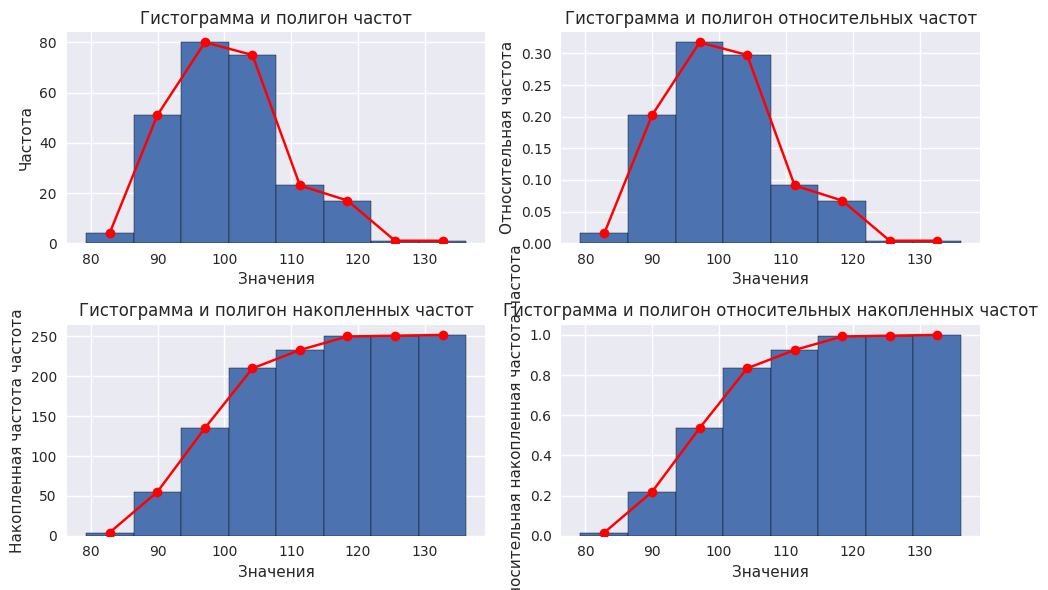

In [ ]:
import matplotlib as mpl

mpl.rcParams["text.usetex"] = False          # выключить LaTeX
mpl.rcParams["font.family"] = "DejaVu Sans"  # шрифт с поддержкой кириллицы
mpl.rcParams["axes.unicode_minus"] = False
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

axes[0, 0].bar(
    bin_centers,
    groups["frequency"],
    width=width,
    edgecolor="black",
)
axes[0, 0].plot(bin_centers, groups["frequency"], marker="o", color="r")
axes[0, 0].set_xlabel("Значения")
axes[0, 0].set_ylabel("Частота")
axes[0, 0].set_title("Гистограмма и полигон частот")

axes[0, 1].bar(
    bin_centers,
    groups["relative frequency"],
    width=width,
    edgecolor="black",
)
axes[0, 1].plot(bin_centers, groups["relative frequency"], marker="o", color="r")
axes[0, 1].set_xlabel("Значения")
axes[0, 1].set_ylabel("Относительная частота")
axes[0, 1].set_title("Гистограмма и полигон относительных частот")

axes[1, 0].bar(
    bin_centers,
    groups["cumulative frequency"],
    width=width,
    edgecolor="black",
)
axes[1, 0].plot(bin_centers, groups["cumulative frequency"], marker="o", color="r")
axes[1, 0].set_xlabel("Значения")
axes[1, 0].set_ylabel("Накопленная частота частота")
axes[1, 0].set_title("Гистограмма и полигон накопленных частот")

axes[1, 1].bar(
    bin_centers,
    groups["cumulative relative frequency"],
    width=width,
    edgecolor="black",
)
axes[1, 1].plot(
    bin_centers, groups["cumulative relative frequency"], marker="o", color="r"
)
axes[1, 1].set_xlabel("Значения")
axes[1, 1].set_ylabel("Относительная накопленная частота частота")
axes[1, 1].set_title("Гистограмма и полигон относительных накопленных частот")

plt.tight_layout()
plt.show()

### Построить эмпирическую фукнцию распределения

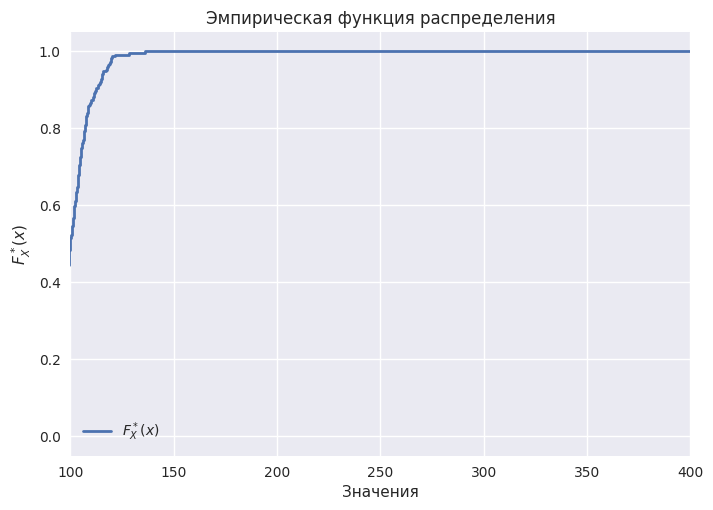

In [ ]:
X_sorted = np.sort(X["value"])
X_sorted = np.concatenate(([-10000], X_sorted, [10000]))
F = np.arange(1, n + 1) / n
F = np.concatenate(([0], F, [1]))
plt.step(X_sorted, F, where="post", label=r"$F_X^*(x)$", linewidth=2)
plt.xlim(100, 400)
plt.xlabel("Значения")
plt.ylabel("$F^*_X(x)$")
plt.legend()
plt.title("Эмпирическая функция распределения")
plt.show()

<a id="2"></a>

# Раздел 2. Интервальные оценки

<a id="21"></a>

## 2.1 Доверительные интервалы для математического ожидания

In [ ]:
X = data("2.1")[0]
X.head()

,B10
0,93.1
1,93.6
2,95.8
3,101.8
4,97.3


In [ ]:
print(n := len(X))

252


### Привести формулы расчёта доверительных интервалов

### Рассчитать доверительные интервалы

In [ ]:
intervals = pd.DataFrame(
    index=pd.Index(
        ["Нижняя граница", "Верхняя граница"], name="Граница доверительного интервала"
    )
)
alphas = [0.01, 0.05, 0.1]
std_err = stats.sem(X)
for alpha in alphas:
    intervals[f"$\\alpha =$ {alpha}"] = stats.t.interval(
        1 - alpha, df=n - 1, loc=X.mean(), scale=std_err
    )
intervals

,$\alpha =$ 0.01,$\alpha =$ 0.05,$\alpha =$ 0.1
Граница доверительного интервала,,,
Нижняя граница,99.445783,99.778285,99.947438
Верхняя граница,102.202630,101.870128,101.700975


In [ ]:
print(dataframe_to_markdown(intervals))

| Граница доверительного интервала | $\alpha =$ 0.01 | $\alpha =$ 0.05 | $\alpha =$ 0.1 |
|---|---|---|---|
| Нижняя граница | 99.45 | 99.78 | 99.95 |
| Верхняя граница | 102.2 | 101.87 | 101.7 |



| Граница доверительного интервала | $\alpha =$ 0.01 | $\alpha =$ 0.05 | $\alpha =$ 0.1 |
| -------------------------------- | --------------- | --------------- | -------------- |
| Нижняя граница                   | 174.12          | 175.28          | 175.87         |
| Верхняя граница                  | 183.73          | 182.57          | 181.98         |

<a id="22"></a>

## 2.2 Доверительные интервалы для дисперсии

### Условие

Анализируемый признак  – `B7` (Weight (lbs))

Объём выборки – $n$ = `252`

Оцениваемый параметр – $\sigma^2$

### Определения

In [ ]:
X = data("2.2")[0]
X.head()

,B10
0,93.1
1,93.6
2,95.8
3,101.8
4,97.3


In [ ]:
print(n := len(X))

252


### Привести формулы расчёта доверительных интервалов

| Граница доверительного интервала | Формула расчёта                                                                               |
| -------------------------------- | --------------------------------------------------------------------------------------------- |
| Нижняя граница                   | $\dfrac{\left(n-1\right) \cdot S^2}{\chi^2_{1-\frac{\alpha}{2}, \left(n-1\right)}}$ |
| Верхняя граница                  | $\dfrac{\left(n-1\right) \cdot S^2}{\chi^2_{\frac{\alpha}{2}, \left(n-1\right)}}$ |


### Рассчитать доверительные интервалы

In [ ]:
intervals = pd.DataFrame(
    index=pd.Index(
        ["Нижняя граница", "Верхняя граница"], name="Граница доверительного интервала"
    )
)
alphas = [0.01, 0.05, 0.1]
for alpha in alphas:
    chi2_upper, chi2_lower = stats.chi2.interval(1 - alpha, df=n - 1)
    intervals[f"$\\alpha =$ {alpha}"] = [
        (n - 1) * X.var(ddof=1) / chi2_lower,
        (n - 1) * X.var(ddof=1) / chi2_upper,
    ]
intervals

,$\alpha =$ 0.01,$\alpha =$ 0.05,$\alpha =$ 0.1
Граница доверительного интервала,,,
Нижняя граница,57.092845,60.110274,61.737290
Верхняя граница,90.533912,85.351358,82.850951


In [ ]:
print(dataframe_to_markdown(intervals))

| Граница доверительного интервала | $\alpha =$ 0.01 | $\alpha =$ 0.05 | $\alpha =$ 0.1 |
|---|---|---|---|
| Нижняя граница | 57.09 | 60.11 | 61.74 |
| Верхняя граница | 90.53 | 85.35 | 82.85 |



<a id="23"></a>

## 2.3 Доверительные интервалы для разности мат. ожиданий

### Условие

In [ ]:
X1, X2 = data("2.3")
X1.head(), X2.head()

(0     93.1
 1     93.6
 2     95.8
 3    101.8
 4     97.3
 Name: B10, dtype: float64,
 0     85.2
 1     83.0
 2     87.9
 3     86.4
 4    100.0
 Name: B11, dtype: float64)

In [ ]:
print(n1 := len(X1), n2 := len(X2))

252 252


### Привести формулы расчёта доверительных интервалов

| Граница доверительного интервала | Формула расчёта                                                                                                                                                 |
| -------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Нижняя граница                   | $\left(\overline{\mathbf{X_1}} - \overline{\mathbf{X_2}}\right) - t_{1-\frac{\alpha}{2}, (n_1 + n_2 -2)} \cdot S \cdot \sqrt{\dfrac{1}{n_1} + \dfrac{1}{n_2}} $ |
| Верхняя граница                  | $\left(\overline{\mathbf{X_1}} - \overline{\mathbf{X_2}}\right) + t_{1-\frac{\alpha}{2}, (n_1 + n_2 -2)} \cdot S \cdot \sqrt{\dfrac{1}{n_1} + \dfrac{1}{n_2}} $ |
| $S$                              | $\sqrt{\dfrac{(n_1 - 1)S_1^2 + (n_2-1) S_2^2}{n_1 + n_2 -2}}  $                                                                                                 |


### Рассчитать доверительные интервалы

In [ ]:
intervals = pd.DataFrame(
    index=pd.Index(
        ["Нижняя граница", "Верхняя граница"], name="Граница доверительного интервала"
    )
)
alphas = [0.01, 0.05, 0.1]
std_err = m.sqrt(
    ((n1 - 1) * X1.var(ddof=1) + (n2 - 1) * X2.var(ddof=1))
    / (n1 + n2 - 2)
    * (1 / n1 + 1 / n2)
)
for alpha in alphas:
    intervals[f"$\\alpha =$ {alpha}"] = stats.t.interval(
        1 - alpha, df=n1 + n2 - 2, loc=X1.mean() - X2.mean(), scale=std_err
    )
intervals

,$\alpha =$ 0.01,$\alpha =$ 0.05,$\alpha =$ 0.1
Граница доверительного интервала,,,
Нижняя граница,6.038818,6.574227,6.847387
Верхняя граница,10.497690,9.962281,9.689121


In [ ]:
print(dataframe_to_markdown(intervals))

| Граница доверительного интервала | $\alpha =$ 0.01 | $\alpha =$ 0.05 | $\alpha =$ 0.1 |
|---|---|---|---|
| Нижняя граница | 6.04 | 6.57 | 6.85 |
| Верхняя граница | 10.5 | 9.96 | 9.69 |



<a id="24"></a>

## 2.4. Доверительные интервалы для отношения дисперсий

### Определения

In [ ]:
X1, X2 = data("2.4")
X1.head(), X2.head()

(0     93.1
 1     93.6
 2     95.8
 3    101.8
 4     97.3
 Name: B10, dtype: float64,
 0     85.2
 1     83.0
 2     87.9
 3     86.4
 4    100.0
 Name: B11, dtype: float64)

In [ ]:
print(n1 := len(X1), n2 := len(X2))

252 252


### Привести формулы расчёта доверительных интервалов

| Граница доверительного интервала | Формула расчёта                                                       |
| -------------------------------- | --------------------------------------------------------------------- |
| Нижняя граница                   | $\dfrac{S_1^2}{S_2^2} \cdot F_{\frac{\alpha}{2}, (n_1-1, n_2-1)}$     |
| Верхняя граница                  | $\dfrac{S_1^2}{S_2^2} \cdot F_{1 - \frac{\alpha}{2}, (n_1-1, n_2-1)}$ |

### Рассчитать доверительные интервалы

In [ ]:
intervals = pd.DataFrame(
    index=pd.Index(
        ["Нижняя граница", "Верхняя граница"], name="Граница доверительного интервала"
    )
)
alphas = [0.01, 0.05, 0.1]
for alpha in alphas:
    intervals[f"$\\alpha =$ {alpha}"] = stats.f.interval(
        1 - alpha, dfn=n1 - 1, dfd=n2 - 1, loc=0, scale=X1.var(ddof=1) / X2.var(ddof=1)
    )
intervals

,$\alpha =$ 0.01,$\alpha =$ 0.05,$\alpha =$ 0.1
Граница доверительного интервала,,,
Нижняя граница,0.441110,0.477001,0.496442
Верхняя граница,0.847014,0.783282,0.752608


In [ ]:
print(dataframe_to_markdown(intervals))

| Граница доверительного интервала | $\alpha =$ 0.01 | $\alpha =$ 0.05 | $\alpha =$ 0.1 |
|---|---|---|---|
| Нижняя граница | 0.44 | 0.48 | 0.5 |
| Верхняя граница | 0.85 | 0.78 | 0.75 |



<a id="3"></a>

# Раздел 3. Проверка статистических гипотез о математических ожиданиях и дисперсиях

<a id="31"></a>

## 3.1 Проверка статистических гипотез о математических ожиданиях

In [ ]:
X = data("3.1")[0]
X.head()
X.describe()

,B10
count,252.000000
mean,100.824206
std,8.430476
min,79.300000
25%,94.350000
50%,99.650000
75%,105.375000
max,136.200000


In [ ]:
print(n := len(X))

252


### Указать формулы расчёта показателей, используемых при проверке статистических гипотез

Мы не знаем параметр $\sigma$, значит используем `t-test`.

|                                                                                  | Выражение                                                                |
| -------------------------------------------------------------------------------- | ------------------------------------------------------------------------ |
| Формула расчёта статистики критерия                                              | $Z = \dfrac{\overline X - m_0}{S/\sqrt{n}}$                              |
| Закон распределения статистики критерия при условии истинности основной гипотезы | $T(n - 1)$                                                               |
| Формулы расчёта критических точек                                                | $\pm t_{1 - \frac{\alpha}{2}, n - 1}$                                    |
| Формула расчёта $p$-value                                                        | $2\min(F_Z(z_{\text{выб}} \mid H_0),\ 1 - F_Z(z_{\text{выб}} \mid H_0))$ |


In [ ]:
alpha = 0.1
m0_list = [100, 178, 240]

mprint(r"### T-test")
for m0 in m0_list:
    z, p_value = stats.ttest_1samp(X, m0)
    mprint(
        r"---",
        f"$H_0: m = m_0 = {m0}$",
        f"$z_{{выб}} =$ {z:.2f}",
        f"$p =$ {p_value:.2f}",
        verdict(alpha, p_value),
    )

### T-test

---

$H_0: m = m_0 = 100$

$z_{выб} =$ 1.55

$p =$ 0.12

$H_0$ принимается

---

$H_0: m = m_0 = 178$

$z_{выб} =$ -145.32

$p =$ 0.00

$H_0$ отклоняется

---

$H_0: m = m_0 = 240$

$z_{выб} =$ -262.07

$p =$ 0.00

$H_0$ отклоняется

## 3.2 Проверка статистических гипотез о дисперсиях

### Условие

### Определения

In [ ]:
X = data("3.2")[0]
X.head()
X.describe()

,B10
count,252.000000
mean,100.824206
std,8.430476
min,79.300000
25%,94.350000
50%,99.650000
75%,105.375000
max,136.200000


In [ ]:
print(n := len(X))

252


### Указать формулы расчёта показателей, используемых при проверке статистических гипотез

Мы не знаем параметр $m$, значит используем $\chi^2-test$.

|                                                                                  | Выражение                                                                 |
| -------------------------------------------------------------------------------- | ------------------------------------------------------------------------- |
| Формула расчёта статистики критерия                                              | $Z = \dfrac{(n - 1)S^2}{\sigma_0^2}$                                      |
| Закон распределения статистики критерия при условии истинности основной гипотезы | $\chi^2(n - 1)$                                                           |
| Формулы расчёта критических точек                                                | $\chi^2_{\frac{\alpha}{2}, n - 1},\ \chi^2_{1 - \frac{\alpha}{2}, n - 1}$ |
| Формула расчёта $p$-value                                                        | $2\min(F_Z(z_{\text{выб}} \mid H_0),\ 1 - F_Z(z_{\text{выб}} \mid H_0))$  |


### Выбрать произвольные значения $\sigma_0$ и проверить статистические гипотезы

In [ ]:
def chisquare(X, sigma0):
    n = len(X)
    z = (n - 1) * X.var(ddof=1) / (sigma0**2)
    df = n - 1
    p_value = 2 * min(stats.chi2.cdf(z, df=df), stats.chi2.sf(z, df=df))
    return z, p_value


In [ ]:
alpha = 0.1
std0_list = [8.43, 10, 20]

mprint(r"### $\chi^2$-test")
for std0 in std0_list:
    z, p_value = chisquare(X, std0)
    mprint(
        r"---",
        f"$H_0: \\sigma = \\sigma_0 = {std0}$",
        f"$z_{{выб}} =$ {z:.2f}",
        f"$p =$ {p_value:.2f}",
        verdict(alpha, p_value),
    )

### $\chi^2$-test

---

$H_0: \sigma = \sigma_0 = 8.43$

$z_{выб} =$ 251.03

$p =$ 0.98

$H_0$ принимается

---

$H_0: \sigma = \sigma_0 = 10$

$z_{выб} =$ 178.39

$p =$ 0.00

$H_0$ отклоняется

---

$H_0: \sigma = \sigma_0 = 20$

$z_{выб} =$ 44.60

$p =$ 0.00

$H_0$ отклоняется

## 3.3 Проверка статистических гипотез о равенстве математических ожиданий

In [ ]:
X1, X2 = data("3.3")
X1.head(), X2.head()

(0     93.1
 1     93.6
 2     95.8
 3    101.8
 4     97.3
 Name: B10, dtype: float64,
 0     85.2
 1     83.0
 2     87.9
 3     86.4
 4    100.0
 Name: B11, dtype: float64)

In [ ]:
print(n1 := len(X1), n2 := len(X2))

252 252


### Указать формулы расчёта показателей, используемых при проверке статистических гипотез

Мы не знаем параметр $\sigma$, значит используем `t-test`.

|                                                                                  | Выражение                                                                                                                                                  |
| -------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Формула расчёта статистики критерия                                              | $Z = \dfrac{\overline{X_1} - \overline{X_2}}{S\sqrt{\dfrac{1}{n_1} + \dfrac{1}{n_2}}}$, где $S^2 = \dfrac{(n_1 - 1)S_1^2 + (n_2 - 1)S_2^2}{n_1 + n_2 - 2}$ |
| Закон распределения статистики критерия при условии истинности основной гипотезы | $T(n_1 + n_2 - 2)$                                                                                                                                         |
| Формулы расчёта критических точек                                                | $\pm t_{1 - \frac{\alpha}{2}, n_1 + n_2 - 2}$                                                                                                              |
| Формула расчёта $p$-value                                                        | $2\min(F_Z(z_{\text{выб}} \mid H_0),\ 1 - F_Z(z_{\text{выб}} \mid H_0))$                                                                                   |


### Проверить статистические гипотезы

In [ ]:
alphas = [0.01, 0.05, 0.1]
z, p_value = stats.ttest_ind(X1, X2)
mprint(
    r"### two-sample T-test",
    f"$H_0: m_1 = m_2$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
)
for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p_value)}")

### two-sample T-test

$H_0: m_1 = m_2$

$z_{выб} =$ 9.59

$p =$ 0.00

При $\alpha = 0.01$ $H_0$ отклоняется

При $\alpha = 0.05$ $H_0$ отклоняется

При $\alpha = 0.1$ $H_0$ отклоняется

## 3.4 Проверка статистических гипотез о равенстве дисперсий

### Условие

Анализируемый признак 1 – `B11` (Abdomen circumference (cm))

Анализируемый признак 2 – `B12` (Hip circumference (cm))

Объёмы выборок – $n_1 = n_2 = 252$

Статистическая гипотеза: $H_0:\ \sigma_1 = \sigma_2; \quad H':\ \sigma_1 \neq \sigma_2$

### Определения

In [ ]:
X1, X2 = data("3.4")
X1.head(), X2.head()

(0     93.1
 1     93.6
 2     95.8
 3    101.8
 4     97.3
 Name: B10, dtype: float64,
 0     85.2
 1     83.0
 2     87.9
 3     86.4
 4    100.0
 Name: B11, dtype: float64)

In [ ]:
print(n1 := len(X1), n2 := len(X2))

252 252


### Указать формулы расчёта показателей, используемых при проверке статистических гипотез

|                                                                                  | Выражение                                                                                 |
| -------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------- |
| Формула расчёта статистики критерия                                              | $Z = \dfrac{S_1^2}{S_2^2}$                                                                |
| Закон распределения статистики критерия при условии истинности основной гипотезы | $F(n_1 - 1,\ n_2 - 1)$                                                                    |
| Формулы расчёта критических точек                                                | $F_{\frac{\alpha}{2},\ n_1 - 1,\ n_2 - 1},\ F_{1 - \frac{\alpha}{2},\ n_1 - 1,\ n_2 - 1}$ |
| Формула расчёта $p$-value                                                        | $2\min(F_Z(z_{\text{выб}} \mid H_0),\ 1 - F_Z(z_{\text{выб}} \mid H_0))$                  |

### Проверить статистические гипотезы

In [ ]:
def Ftest(X1, X2):
    n1 = len(X1)
    n2 = len(X2)
    z = X1.var(ddof=1) / X2.var(ddof=1)
    cdf = stats.f.cdf(z, dfn=n1 - 1, dfd=n2 - 1)
    p_value = 2 * min(cdf, 1 - cdf)
    return z, p_value

In [ ]:
alphas = [0.01, 0.05, 0.1]
z, p_value = Ftest(X1, X2)
mprint(
    r"### F-test",
    f"$H_0: \\sigma_1 = \\sigma_2$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
)

for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p_value)}")

### F-test

$H_0: \sigma_1 = \sigma_2$

$z_{выб} =$ 0.61

$p =$ 0.00

При $\alpha = 0.01$ $H_0$ отклоняется

При $\alpha = 0.05$ $H_0$ отклоняется

При $\alpha = 0.1$ $H_0$ отклоняется

<a id="4"></a>

# Раздел 4. Критерии согласия

## Условие

Анализируемый признак  – `B7` (Weight (lbs))

Объём выборки – `252`

## Определения

In [ ]:
X = data("4")[0]
X.head()

,B10
0,93.1
1,93.6
2,95.8
3,101.8
4,97.3


In [ ]:
print(n := len(X))

252


<a id="41"></a>

## 4.1 Критерий $\chi^2$

Теоретическое распределение - нормальное.

Статистическая гипотеза - $H_0:\ X \sim N; \quad H':\ X \nsim N$

### Выбрать число групп

Область всевозможных значений предполагаемого распределения делят на $k$ групп(интервалов). Наше предполагаемое распределение - нормальное. Поэтому делим ВСЮ числовую прямую на $k$ интервалов.

Обычно выбирают число групп по формуле Стерджесса: $k \approx 1 + 1,3 \ln{n}$.

Однако критерий $\chi^2$ чувствителен к группам, для которых ожидаемые частоты $n \cdot p_i$ меньше 5. Поэтому при группировке нужно учитывать это.

Я поступал следующим образом:
1. Разбивал выборку на $k$ групп библиотечными функциями.
2. Левый конец первого интервала и правый конец второго интервала устремлял в $\infty$.
3. Рассчитывал $n \cdot p_i$, и в зависимости от этого соединял некоторые соседние интервалы.
4. Если нужно, подразбивал интервалы с большим $n \cdot p_i$.

In [ ]:
k = round(1 + 1.3 * m.log(n))
k

8

In [ ]:
frequences, bin_edges = np.histogram(X, bins=k)
bin_edges

array([ 79.3   ,  86.4125,  93.525 , 100.6375, 107.75  , 114.8625,
       121.975 , 129.0875, 136.2   ])

<a id="pm1000"></a>

Устремляю левый конец первого интервала в $-\infty$ и правый конец последнего интервала в $+\infty$. Можно считать, что точки $\pm1000$ - это $\pm\infty$, так как за интервал $(-1000, 1000)$, смотря по выборке, вероятность попадания ничтожно мала. Но в каких то случаях, нужно скорректировать эти значения.

In [ ]:
bin_edges[0] = -1000
bin_edges[-1] = 1000
bin_edges

array([-1000.    ,    86.4125,    93.525 ,   100.6375,   107.75  ,
         114.8625,   121.975 ,   129.0875,  1000.    ])

Для каждого интервала $[a_{i-1}, a_i]$ найдём $p_i = G(a_i) - G(a_{i-1})$ - вероятность попадания случайной величины $\mathbf X$ в интервал $[a_{i-1}, a_i]$ в условиях $H_0$.

Напомним, что в данном случае теоретическое распределение - нормальное. Поэтому и будем использовать `stats.norm.cdf()`.

In [ ]:
probabilities = np.diff(stats.norm(loc=X.mean(), scale=X.std(ddof=1)).cdf(bin_edges))
probabilities

array([0.04368129, 0.14961536, 0.29786886, 0.30315907, 0.15773741,
       0.04188176, 0.00565585, 0.0004004 ])

Мы нашли вероятности попасть в каждый интервал. Теперь найдём ожидаемые частоты $n \cdot p_i$.

In [ ]:
def get_expected_frequencies(bin_edges, n, cdf=stats.norm.cdf):
    probabilities = np.diff(cdf(bin_edges))
    return n * probabilities

In [ ]:
get_expected_frequencies(
    bin_edges, n, cdf=stats.norm(loc=X.mean(), scale=X.std(ddof=1)).cdf
)

array([11.00768476, 37.7030713 , 75.06295197, 76.39608447, 39.74982698,
       10.5542042 ,  1.42527431,  0.10090202])

Как видим, для пятого и всех последующих интервалов ожидаемые частоты меньше 5. Условие $n \cdot p_i \gtrsim 5$ не выполняется.

Следует объединить эти интервалы с соседними, пока это условие не будет выполнено.

In [ ]:
def merge_interval(bin_edges, expected_frequencies, i):
    # Объединяем два интервала в зависимости от их индексов.
    if i == 0:  # Крайний левый интервал
        bin_edges.pop(i + 1)
        expected_frequencies[i + 1] += expected_frequencies[i]
    elif i == len(bin_edges) - 2:  # Крайний правый интервал
        bin_edges.pop(i)
        expected_frequencies[i - 1] += expected_frequencies[i]
    else:  # Объединяем с соседом c наименьшим expected_frequencies
        if expected_frequencies[i - 1] < expected_frequencies[i + 1]:
            bin_edges.pop(i)
            expected_frequencies[i - 1] += expected_frequencies[i]
        else:
            bin_edges.pop(i + 1)
            expected_frequencies[i + 1] += expected_frequencies[i]
    expected_frequencies.pop(i)

In [ ]:
def adjust_intervals(bin_edges, n, distrib=stats.norm, k=None):
    """
    Функция для корректировки интервалов и вероятностей

    Параметры:
    bin_edges: Границы интервалов
    n: uint - объем выборки
    distrib: распределение, которое мы хотим использовать для подсчета вероятностей
    k: uint
        Количество интервалов, которое мы хотим получить на выходе.
        Работает следующим образом:
        если None, то мы просто объединяем интервалы с малой ожидаемой частотой с соседними. На выходе получаем k <= len(intervals).
        если число, то мы сначала объединяем интервалы с малой ожидаемой частотой, получая k <= len(intervals),
        а затем разбиваем интервалы, для которых ожидаемая частота большая, таким образом получая на выходе k >= len(intervals).
    """
    cdf = distrib.cdf
    ppf = distrib.ppf
    expected_frequencies = get_expected_frequencies(bin_edges, n, cdf=cdf).tolist()
    if type(bin_edges) == np.ndarray:
        bin_edges = bin_edges.tolist()

    # Слияние интервалов с ожидаемой частотой <= 5
    i = 0
    while True:
        if expected_frequencies[i] <= 5:
            merge_interval(bin_edges, expected_frequencies, i)
            i -= 1

        i += 1
        if i >= len(bin_edges) - 1:
            break

    # Разбиение интервалов с максимальной ожидаемой частотой.
    if k is not None:
        while len(bin_edges) < k + 1:
            max_expected_frequency = max(expected_frequencies)

            # если максимальная ожидаемая частота меньше 10, то нельзя подразбивать интервалы
            if max_expected_frequency < 10:
                break

            max_index = expected_frequencies.index(max_expected_frequency)
            a, b = bin_edges[max_index : max_index + 2]

            # Находим такое c, что ожидаемая частота в интервалах (a, c) и (c, b) как минимум 5
            c = (ppf(cdf(a) + 5 / n) + ppf(cdf(b) - 5 / n)) / 2

            e_left, e_right = get_expected_frequencies([a, c, b], n, cdf=cdf)

            bin_edges.insert(max_index + 1, c)

            expected_frequencies[max_index] = e_left
            expected_frequencies.insert(max_index + 1, e_right)

    return np.array(bin_edges), np.array(expected_frequencies)

In [ ]:
bin_edges, expected_frequencies = adjust_intervals(
    bin_edges, n, distrib=stats.norm(loc=X.mean(), scale=X.std(ddof=1)), k=8
)
bin_edges, expected_frequencies

(array([-1000.        ,    86.4125    ,    93.525     ,    97.16739447,
          100.6375    ,   104.11751565,   107.75      ,   114.8625    ,
         1000.        ]),
 array([11.00768476, 37.7030713 , 35.01145239, 40.05149958, 40.52262244,
        35.87346203, 39.74982698, 12.08038053]))

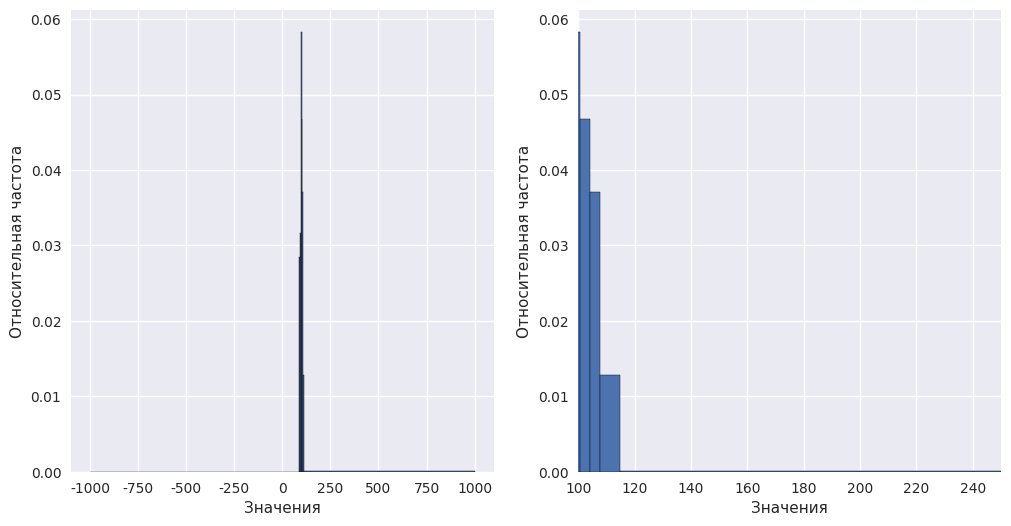

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].hist(X, bins=bin_edges, edgecolor="black", density=True)
axes[0].set_xlabel("Значения")
axes[0].set_ylabel("Относительная частота")

axes[1].hist(X, bins=bin_edges, edgecolor="black", density=True)
axes[1].set_xlabel("Значения")
axes[1].set_ylabel("Относительная частота")
plt.xlim(100, 250)

plt.show()

Теперь мы чётко разбили всю числовую прямую на интервалы, для которых ожидаемые частоты $n \cdot p_i \gtrsim 5$.

In [ ]:
mprint(
    f"Число интервалов: {k}",
    f"Ширина интервалов: от {np.diff(bin_edges).min():.2f} до {np.diff(bin_edges).max():.2f}",
)

Число интервалов: 8

Ширина интервалов: от 3.47 до 1086.41

| Число интервалов | Обоснование выбора числа интервалов                                                                               | Ширина интервалов   |
| ---------------- | ----------------------------------------------------------------------------------------------------------------- | ------------------- |
| 8                | $k \approx 1 + 1,3 \ln{n}$ - формула Стерджесса $\\n \cdot p_i \gtrsim 5$ - поправка на чувствительность критерия | от 7.30 до $\infty$ |



### Построить таблицу частот

In [ ]:
groups = pd.DataFrame(index=pd.Index(range(1, len(bin_edges)), name="Номер интервала"))
groups["low edge"] = bin_edges[:-1]
groups["high edge"] = bin_edges[1:]
groups["frequency"] = groups.apply(
    lambda row: ((X >= row["low edge"]) & (X < row["high edge"])).sum(), axis=1
)
groups["relative frequency"] = groups["frequency"] / n
groups["expected probability"] = expected_frequencies / n
groups

,low edge,high edge,frequency,relative frequency,expected probability
Номер интервала,,,,,
1,-1000.000000,86.412500,4,0.015873,0.043681
2,86.412500,93.525000,51,0.202381,0.149615
3,93.525000,97.167394,29,0.115079,0.138934
4,97.167394,100.637500,51,0.202381,0.158935
5,100.637500,104.117516,41,0.162698,0.160804
6,104.117516,107.750000,34,0.134921,0.142355
7,107.750000,114.862500,23,0.091270,0.157737
8,114.862500,1000.000000,19,0.075397,0.047938


In [ ]:
print(dataframe_to_markdown(groups))

| Номер интервала | low edge | high edge | frequency | relative frequency | expected probability |
|---|---|---|---|---|---|
| 1 | -1000.0 | 86.41 | 4.0 | 0.02 | 0.04 |
| 2 | 86.41 | 93.52 | 51.0 | 0.2 | 0.15 |
| 3 | 93.52 | 97.17 | 29.0 | 0.12 | 0.14 |
| 4 | 97.17 | 100.64 | 51.0 | 0.2 | 0.16 |
| 5 | 100.64 | 104.12 | 41.0 | 0.16 | 0.16 |
| 6 | 104.12 | 107.75 | 34.0 | 0.13 | 0.14 |
| 7 | 107.75 | 114.86 | 23.0 | 0.09 | 0.16 |
| 8 | 114.86 | 1000.0 | 19.0 | 0.08 | 0.05 |



### Построить гистограмму относительных частот и функцию плотности теоретического распределения на одном графике

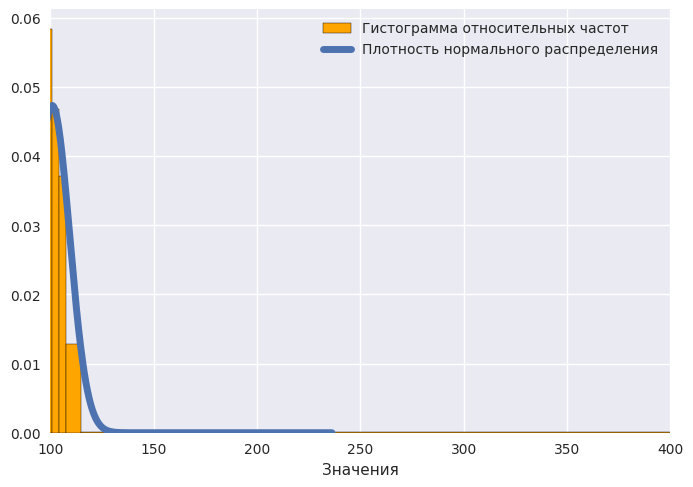

In [ ]:
grid = np.linspace(X.min() - 100, X.max() + 100, 1000)
plt.hist(
    X,
    bins=bin_edges,
    edgecolor="black",
    density=True,
    label="Гистограмма относительных частот",
    color="orange",
)

plt.plot(
    grid,
    stats.norm.pdf(grid, loc=X.mean(), scale=X.std(ddof=1)),
    label="Плотность нормального распределения",
    lw=5,
)
plt.legend()
plt.xlim(100, 400)
plt.xlabel("Значения")
plt.show()

### Проверить статистические гипотезы

In [ ]:
alphas = [0.01, 0.05, 0.1]

z, p_value = stats.chisquare(groups["frequency"], expected_frequencies, ddof=2)
mprint(
    r"### $\chi^2$-test",
    f"$H_0: F_X(x) = N(\\mu, \\sigma)$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
)

for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p_value)}")

### $\chi^2$-test

$H_0: F_X(x) = N(\mu, \sigma)$

$z_{выб} =$ 24.30

$p =$ 0.00

При $\alpha = 0.01$ $H_0$ отклоняется

При $\alpha = 0.05$ $H_0$ отклоняется

При $\alpha = 0.1$ $H_0$ отклоняется

<a id="42"></a>

## 4.2 Критерий Харке-Бера

Статистическая гипотеза: $H_0:\ X \sim N; \quad H':\ X \nsim N$

### Указать формулы расчёта показателей, используемых при проверке статистических гипотез

|                                                                                  | Выражение                                                                                                                         | Пояснение использованных обозначений                                                                                                    |
| -------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------- |
| Формула расчёта статистики критерия                                              | $Z = Z^2_1 + Z^2_2$, где $\\Z_1 = \dfrac{\gamma^*_X}{\sqrt{\dfrac{6}{n}}};\\ Z_2 = \dfrac{\varepsilon^*_X}{\sqrt{\dfrac{24}{n}}}$ | $\gamma^*_X$ - [выборочный коэффициент асимметрии](#формулы), $\\ \varepsilon^*_X$ - [выборочный эксцесс](#формулы), $\\ n$ - объём выборки. |
| Закон распределения статистики критерия при условии истинности основной гипотезы | $\chi^2(2)$                                                                                                                       |                                                                                                                                         |
| Формулы расчёта критической точки                                                | $\chi^2_{1 - \alpha,\ 2}$                                                                                                         | Правосторонняя критическая область.              |
| Формула расчёта $p$-value                                                        | $1 - F_Z(z_{\text{выб}} \mid H_0)$                                                                                                |                                                                                                                                         |

### Проверить статистические гипотезы

In [ ]:
z, p_value = stats.jarque_bera(X)
mprint(
    r"### Jarque-Bera test",
    f"$H_0: F_X(x) = N(\\mu, \\sigma)$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
)

for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p_value)}")

### Jarque-Bera test

$H_0: F_X(x) = N(\mu, \sigma)$

$z_{выб} =$ 28.64

$p =$ 0.00

При $\alpha = 0.01$ $H_0$ отклоняется

При $\alpha = 0.05$ $H_0$ отклоняется

При $\alpha = 0.1$ $H_0$ отклоняется

## Вывод (в терминах предметной области):

В результате проведённого в п.4 статистического анализа обнаружено, что критерий $\chi^2$ не отвергает гипотезу о нормальности распределения, но критерий Харке-Бера отвергает её.

Так как для этих данных критерий Харке-Бера более чувствителен, чем критерий $\chi^2$, то можно сделать вывод, что выборка `B7` не имеет нормального распределения.

<a id="5"></a>

# Раздел 5. Проверка однородности выборок

## Определения

In [ ]:
X, Y = data("5")

X.head(), Y.head()

(0     93.1
 1     93.6
 2     95.8
 3    101.8
 4     97.3
 Name: B10, dtype: float64,
 0     85.2
 1     83.0
 2     87.9
 3     86.4
 4    100.0
 Name: B11, dtype: float64)

In [ ]:
print(n1 := len(X), n2 := len(Y))

252 252


<a id="51"></a>

## 5.1 Критерий знаков

Статистическая гипотеза: $H_0:\ F_{X}(x) = F_{Y}(x); \quad H':\ F_{X}(x) \neq F_{Y}(x)$

### Указать формулы расчёта показателей, используемых при проверке статистических гипотез

|                                                                                  | Выражение                                                                                                                         | Пояснение использованных обозначений                                                                                                    |
| -------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------- |
| Формула расчёта статистики критерия                                              | $Z = \dfrac{K_+ - \dfrac{n}{2}}{\sqrt{\dfrac{n}{4}}}$ | $K_+$ - количество знаков `+` в выборке $z_1, \dots, z_n = x_1 - y_1, \dots, x_n - y_n$ |
| Закон распределения статистики критерия при условии истинности основной гипотезы | $N(0, 1)$                                                                                                                       |                                                                                                                                         |
| Формулы расчёта критической точки                                                | $\pm u_{1 - \frac{\alpha}{2}}$                                                                                                         | Двусторонняя критическая область.              |
| Формула расчёта $p$-value                                                        | $2\min(F_Z(z_{\text{выб}} \mid H_0),\ 1 - F_Z(z_{\text{выб}} \mid H_0))$                                                                                                |                                                                                                                                         |


### Проверить статистические гипотезы

In [ ]:
def sign_test(X, Y):
    if len(X) != len(Y):
        raise ValueError("Длины выборок должны совпадать")
    n = len(X)
    k = sum(X > Y)
    z = (k - n / 2) / m.sqrt(n / 4)
    p_value = 2 * min(stats.norm.cdf(z), 1 - stats.norm.cdf(z))
    return z, p_value

In [ ]:
alphas = [0.01, 0.05, 0.1]

z, p_value = sign_test(X, Y)
mprint(
    r"### Sign test",
    f"$H_0: F_X(x) = F_Y(x)$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
)

for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p_value)}")

### Sign test

$H_0: F_X(x) = F_Y(x)$

$z_{выб} =$ 14.74

$p =$ 0.00

При $\alpha = 0.01$ $H_0$ отклоняется

При $\alpha = 0.05$ $H_0$ отклоняется

При $\alpha = 0.1$ $H_0$ отклоняется

## 5.2 Критерий $\chi^2$

Статистическая гипотеза: $H_0:\ F_{X}(x) = F_{Y}(x); \quad H':\ F_{X}(x) \neq F_{Y}(x)$

### Указать формулы расчёта показателей, используемых при проверке статистических гипотез

|                                                                                  | Выражение                                                                                                                         | Пояснение использованных обозначений                                                                                                    |
| -------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------- |
| Формула расчёта статистики критерия                                              | $Z = nm\sum\limits_{i=1}^{k}\dfrac{1}{n_i+m_i}\left(\dfrac{n_i}{n} + \dfrac{m_i}{m}\right)$ | $k$ - число интервалов в группированном статистическом ряду. $\\$ $n_i$ - частота попадания случайной величины $\mathbf X$ в интервал $\Delta_i$. $\\$ $m_i$ - частота попадания случайной величины $\mathbf X$ в интервал $\Delta_i$. $\\$ $n$ - объём выборки $x_1, \dots, x_n$ $\\$ $m$ - объём выборки $y_1, \dots, y_m$ |
| Закон распределения статистики критерия при условии истинности основной гипотезы | $\chi^2(k - 1)$                                                                                                                       |                                                                                                                                         |
| Формулы расчёта критической точки                                                | $\chi^2_{1 - \alpha,\ k - 1}$                                                                                                         | Правосторонняя критическая область.              |
| Формула расчёта $p$-value                                                        | $1 - F_Z(z_{\text{выб}} \mid H_0)$                                                                                                |                                                                                                                                         |

### Выбрать число групп

In [ ]:
frequences[1]

array([ 23.,  90., 184., 153.,  43.,   9.,   1.,   1.])

Как видим, для последних трёх интервалов $n_i + m_i < 5$. Условие $n_i + m_i \gtrsim 5$ не выполняется.

Следует объединить эти интервалы с соседними, пока это условие не будет выполнено.

In [ ]:
def merge_interval(bin_edges, frequences1, frequences2, i):
    if i == 0:
        bin_edges.pop(i + 1)
        frequences1[i + 1] += frequences1[i]
        frequences2[i + 1] += frequences2[i]
    elif i == len(bin_edges) - 2:
        bin_edges.pop(i)
        frequences1[i - 1] += frequences1[i]
        frequences2[i - 1] += frequences2[i]
    else:
        if (
            frequences1[i - 1] + frequences2[i - 1]
            < frequences1[i + 1] + frequences2[i + 1]
        ):
            bin_edges.pop(i)
            frequences1[i - 1] += frequences1[i]
            frequences2[i - 1] += frequences2[i]
        else:
            bin_edges.pop(i + 1)
            frequences1[i + 1] += frequences1[i]
            frequences2[i + 1] += frequences2[i]
    frequences1.pop(i)
    frequences2.pop(i)

In [ ]:
def adjust_intervals(bin_edges, X1, X2, k=None):
    """
    Функция для корректировки интервалов и частот попадания в них
    bin_edges: Границы интервалов
    X1: Первая выборка
    X2: Вторая выборка
    k: uint
        Количество интервалов, которое мы хотим получить на выходе.
        Работает следующим образом:
        если None, то мы просто объединяем интервалы с малой частотой попадания с соседними. На выходе получаем k <= len(intervals).
        если число, то мы сначала объединяем интервалы с малой частотой попадания, получая k <= len(intervals),
        а затем разбиваем интервалы, для которых частота попадания большая, таким образом получая на выходе k >= len(intervals).
    """
    frequences1, _ = np.histogram(X1, bins=bin_edges)
    frequences2, _ = np.histogram(X2, bins=bin_edges)
    frequences1 = frequences1.tolist()
    frequences2 = frequences2.tolist()

    i = 0
    while True:
        if frequences1[i] + frequences2[i] < 5:
            merge_interval(bin_edges, frequences1, frequences2, i)
            i -= 1

        i += 1
        if i >= len(bin_edges) - 1:
            break

    if k is not None:
        while len(bin_edges) < k + 1:
            total_frequency = [x + y for x, y in zip(frequences1, frequences2)]
            max_frequency = max(total_frequency)

            if max_frequency < 10:
                break

            max_index = total_frequency.index(max_frequency)
            a, b = bin_edges[max_index : max_index + 2]

            # Находим такое c, что частота попадания в интервалах (a, c) и (c, b) как минимум 5
            c = (a + b) / 2

            frequences1[max_index] = ((X1 >= a) & (X1 < c)).sum()
            frequences2[max_index] = ((X2 >= a) & (X2 < c)).sum()
            frequences1.insert(max_index + 1, ((X1 >= c) & (X1 < b)).sum())
            frequences2.insert(max_index + 1, ((X2 >= c) & (X2 < b)).sum())
            bin_edges.insert(max_index + 1, c)

    return bin_edges, frequences1, frequences2

In [ ]:
bin_edges, frequences1, frequences2 = adjust_intervals(bin_edges.tolist(), X, Y, k=k)
np.array(frequences1) + np.array(frequences2)

array([23, 90, 93, 91, 88, 65, 43, 11])

In [ ]:
mprint(
    f"Число интервалов: {k}",
    f"Ширина интервалов: от {np.diff(bin_edges).min():.2f} до {np.diff(bin_edges).max():.2f}",
)

Число интервалов: 8

Ширина интервалов: от 4.92 до 29.51

| Число интервалов | Обоснование выбора числа интервалов                                                                                     | Ширина интервалов |
| ---------------- | ----------------------------------------------------------------------------------------------------------------------- | ----------------- |
| 8                | $k \approx 1 + 1.3 \ln \max(n, m)$ - формула Стерджесса $\\n_i + m_i \gtrsim 5$ - поправка на чувствительность критерия | от 4.92 до 29.51  |



### Построить таблицу частот

In [ ]:
groups = pd.DataFrame(index=pd.Index(range(1, len(bin_edges)), name="Номер интервала"))
groups["low edge"] = bin_edges[:-1]
groups["high edge"] = bin_edges[1:]
groups["frequency1"] = frequences[0]
groups["frequency2"] = frequences[1] - frequences[0]
groups["relative frequency1"] = groups["frequency1"] / n1
groups["relative frequency2"] = groups["frequency2"] / n2

groups

,low edge,high edge,frequency1,frequency2,relative frequency1,relative frequency2
Номер интервала,,,,,,
1,69.40000,79.23750,0.0,23.0,0.000000,0.091270
2,79.23750,89.07500,13.0,77.0,0.051587,0.305556
3,89.07500,93.99375,45.0,48.0,0.178571,0.190476
4,93.99375,98.91250,53.0,38.0,0.210317,0.150794
5,98.91250,103.83125,60.0,28.0,0.238095,0.111111
6,103.83125,108.75000,45.0,20.0,0.178571,0.079365
7,108.75000,118.58750,28.0,15.0,0.111111,0.059524
8,118.58750,148.10000,8.0,3.0,0.031746,0.011905


In [ ]:
print(dataframe_to_markdown(groups))

| Номер интервала | low edge | high edge | frequency1 | frequency2 | relative frequency1 | relative frequency2 |
|---|---|---|---|---|---|---|
| 1 | 69.4 | 79.24 | 0.0 | 23.0 | 0.0 | 0.09 |
| 2 | 79.24 | 89.08 | 13.0 | 77.0 | 0.05 | 0.31 |
| 3 | 89.08 | 93.99 | 45.0 | 48.0 | 0.18 | 0.19 |
| 4 | 93.99 | 98.91 | 53.0 | 38.0 | 0.21 | 0.15 |
| 5 | 98.91 | 103.83 | 60.0 | 28.0 | 0.24 | 0.11 |
| 6 | 103.83 | 108.75 | 45.0 | 20.0 | 0.18 | 0.08 |
| 7 | 108.75 | 118.59 | 28.0 | 15.0 | 0.11 | 0.06 |
| 8 | 118.59 | 148.1 | 8.0 | 3.0 | 0.03 | 0.01 |



| Номер интервала | Нижняя граница | Верхняя граница | Частота признака 1 | Частота признака 2 | Относительная частота признака 1 | Относительная частота признака 2 |
| --------------- | -------------- | --------------- | ------------------ | ------------------ | -------------------------------- | -------------------------------- |
| 1               | 69.4           | 79.24           | 23.0               | 0.0                | 0.09                             | 0.0                              |
| 2               | 79.24          | 89.08           | 77.0               | 12.0               | 0.31                             | 0.05                             |
| 3               | 89.08          | 93.99           | 48.0               | 30.0               | 0.19                             | 0.12                             |
| 4               | 93.99          | 98.91           | 38.0               | 76.0               | 0.15                             | 0.3                              |
| 5               | 98.91          | 103.83          | 28.0               | 73.0               | 0.11                             | 0.29                             |
| 6               | 103.83         | 108.75          | 20.0               | 35.0               | 0.08                             | 0.14                             |
| 7               | 108.75         | 118.59          | 15.0               | 24.0               | 0.06                             | 0.1                              |
| 8               | 118.59         | 148.1           | 3.0                | 2.0                | 0.01                             | 0.01                             |

### Построить гистограммы относительных частот на одном графике

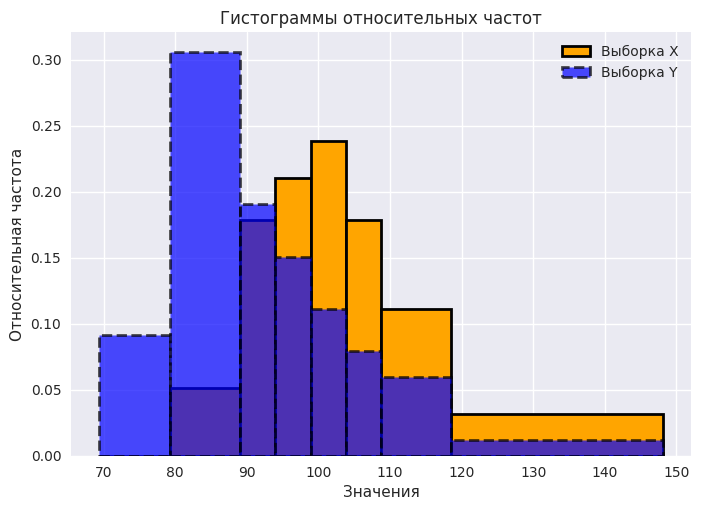

In [ ]:
plt.bar(
    (groups["low edge"] + groups["high edge"]) / 2,
    groups["relative frequency1"],
    width=groups["high edge"] - groups["low edge"],
    edgecolor="black",
    label="Выборка X",
    color="orange",
    lw=2,
)

plt.bar(
    (groups["low edge"] + groups["high edge"]) / 2,
    groups["relative frequency2"],
    width=groups["high edge"] - groups["low edge"],
    edgecolor="black",
    label="Выборка Y",
    alpha=0.7,
    linestyle="--",
    lw=2,
    color="blue",
)
plt.legend()
plt.title("Гистограммы относительных частот")
plt.xlabel("Значения")
plt.ylabel("Относительная частота")
plt.show()

### Проверить статистические гипотезы

In [ ]:
def chi2_2samp(frequencies1, frequencies2):
    if len(frequencies1) != len(frequencies2):
        raise ValueError("Длины выборок должны совпадать")
    k = len(frequencies1)
    n = sum(frequencies1)
    m = sum(frequencies2)
    z = (
        n
        * m
        * sum(
            (frequencies1 / n - frequencies2 / m) ** 2 / (frequencies1 + frequencies2)
        )
    )
    p_value = stats.chi2.sf(z, df=k - 1)
    return z, p_value

In [ ]:
alphas = [0.01, 0.05, 0.1]

z, p_value = chi2_2samp(groups["frequency1"], groups["frequency2"])
mprint(
    r"### $\chi^2$-test",
    f"$H_0: F_X(x) = F_Y(x)$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
)

for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p_value)}")

### $\chi^2$-test

$H_0: F_X(x) = F_Y(x)$

$z_{выб} =$ 98.54

$p =$ 0.00

При $\alpha = 0.01$ $H_0$ отклоняется

При $\alpha = 0.05$ $H_0$ отклоняется

При $\alpha = 0.1$ $H_0$ отклоняется

| Уровень значимости | Выборочное значение статистического критерия | $p$-value | Статистическое решение | Вывод                    |
| ------------------ | -------------------------------------------- | --------- | ---------------------- | ------------------------ |
| 0.01               | 113.71                                       | 0.0       | $H_0$ отклоняется      | $F_{X}(x) \neq F_{Y}(x)$ |
| 0.05               | 113.71                                       | 0.0       | $H_0$ отклоняется      | $F_{X}(x) \neq F_{Y}(x)$ |
| 0.1                | 113.71                                       | 0.0       | $H_0$ отклоняется      | $F_{X}(x) \neq F_{Y}(x)$ |

<a id="6"></a>

# Раздел 6. Таблицы сопряжённости

## Условие

Статистическая гипотеза $H_0:\ F_Y(y \mid_{X = x^{(1)}}) = F_Y(y \mid_{X = x^{(2)}}) = \dots = F_Y(y \mid_{X = x^{(k_1)}}) = F_Y(y); \quad H':\ \exists i, j: F_Y(y \mid_{X = x^{(i)}}) \neq F_Y(y \mid_{X = x^{(j)})}$

## Определения

In [ ]:
X, Y = data("6")
X.head(), Y.head()

(0    normal
 1       low
 2      high
 3    normal
 4      high
 Name: B3, dtype: object,
 0    Somerville
 1    Somerville
 2    Somerville
 3    Somerville
 4    Somerville
 Name: B6, dtype: object)

In [ ]:
print(n1 := len(X), n2 := len(Y))
if n1 == n2:
    n = n1

252 252


## Указать формулы расчёта показателей, используемых при проверке статистических гипотез

## Построить эмпирическую таблицу сопряжённости

In [ ]:
df = pd.DataFrame({"X": X, "Y": Y})
df

,X,Y
0,normal,Somerville
1,low,Somerville
2,high,Somerville
3,normal,Somerville
4,high,Somerville
...,...,...
247,normal,Revere
248,high,Revere
249,high,Revere
250,high,Revere


In [ ]:
emperical_table = pd.crosstab(df["X"], df["Y"], margins=True)
emperical_table

Y,Arlington,Norwood,Revere,Somerville,All
X,,,,,
high,39,20,39,22,120
low,8,4,11,16,39
normal,26,17,32,18,93
All,73,41,82,56,252


In [ ]:
print(dataframe_to_markdown(emperical_table))

| X\Y | Arlington | Norwood | Revere | Somerville | All |
|---|---|---|---|---|---|
| high | 39 | 20 | 39 | 22 | 120 |
| low | 8 | 4 | 11 | 16 | 39 |
| normal | 26 | 17 | 32 | 18 | 93 |
| All | 73 | 41 | 82 | 56 | 252 |



| X\Y    | Female | Male | All |
| ------ | ------ | ---- | --- |
| high   | 65     | 55   | 120 |
| low    | 8      | 31   | 39  |
| normal | 20     | 73   | 93  |
| All    | 93     | 159  | 252 |

| Вариант X\Вариант Y | $y^{(1)}$ | $y^{(2)}$ | $\sum$ |
| ------------------- | --------- | --------- | ------ |
| $x^{(1)}$           | 65        | 55        | 120    |
| $x^{(2)}$           | 8         | 31        | 39     |
| $x^{(3)}$           | 20        | 73        | 93     |
| $\sum$              | 93        | 159       | 252    |

## Построить теоретическую таблицу сопряжённости

### Теоретическая справка

--

$$
A = \overrightarrow{V_1}^T \cdot \overrightarrow{V_2} = \begin{pmatrix}
\sum\limits_{k = 1}^{k_2}n_{1k} \\
\sum\limits_{k = 1}^{k_2}n_{2k} \\
\vdots \\
\sum\limits_{k = 1}^{k_2}n_{k_1k} \\
\end{pmatrix} \cdot \begin{pmatrix} \sum\limits_{l=1}^{k_1}n_{l1} & \sum\limits_{l=1}^{k_1}n_{l2} & \cdots & \sum\limits_{l=1}^{k_1}n_{lk_2} \end{pmatrix} =
\begin{pmatrix}
\sum\limits_{k = 1}^{k_2}n_{1k} \cdot \sum\limits_{l=1}^{k_1}n_{l1} & \cdots & \sum\limits_{k = 1}^{k_2}n_{1k} \cdot \sum\limits_{l=1}^{k_1}n_{lk_2} \\
\cdots & \ddots & \cdots \\
\sum\limits_{k = 1}^{k_2}n_{k_1k} \cdot \sum\limits_{l=1}^{k_1}n_{l1} &  \cdots & \sum\limits_{k = 1}^{k_2}n_{k_1k} \cdot \sum\limits_{l=1}^{k_1}n_{lk_2} \\
\end{pmatrix}
$$


Получаем $\overrightarrow{V_1}^T$:

In [ ]:
V1 = np.array(emperical_table.iloc[:-1, -1])
V1

array([120,  39,  93])

In [ ]:
V1 = np.atleast_2d(V1).T
V1

array([[120],
       [ 39],
       [ 93]])

Получаем $\overrightarrow{V_2}$:

In [ ]:
V2 = np.array(emperical_table.iloc[-1][:-1])
V2

array([73, 41, 82, 56])

In [ ]:
V2 = np.atleast_2d(V2)
V2

array([[73, 41, 82, 56]])

Получаем матрицу $A$:

In [ ]:
A = np.dot(V1, V2)
A

array([[8760, 4920, 9840, 6720],
       [2847, 1599, 3198, 2184],
       [6789, 3813, 7626, 5208]])

Строим теоретическую таблицу сопряжённости:

In [ ]:
theoretical_table = pd.DataFrame(
    A / n,
    index=emperical_table.index[:-1],
    columns=emperical_table.columns[:-1],
)
theoretical_table

Y,Arlington,Norwood,Revere,Somerville
X,,,,
high,34.761905,19.523810,39.047619,26.666667
low,11.297619,6.345238,12.690476,8.666667
normal,26.940476,15.130952,30.261905,20.666667


Добавим в таблицу суммы по строкам и столбцам:

In [ ]:
theoretical_table["All"] = theoretical_table.sum(axis=1)
theoretical_table.loc["All"] = theoretical_table.sum()
theoretical_table

Y,Arlington,Norwood,Revere,Somerville,All
X,,,,,
high,34.761905,19.523810,39.047619,26.666667,120.0
low,11.297619,6.345238,12.690476,8.666667,39.0
normal,26.940476,15.130952,30.261905,20.666667,93.0
All,73.000000,41.000000,82.000000,56.000000,252.0


In [ ]:
print(dataframe_to_markdown(theoretical_table))

| X\Y | Arlington | Norwood | Revere | Somerville | All |
|---|---|---|---|---|---|
| high | 34.76 | 19.52 | 39.05 | 26.67 | 120.0 |
| low | 11.3 | 6.35 | 12.69 | 8.67 | 39.0 |
| normal | 26.94 | 15.13 | 30.26 | 20.67 | 93.0 |
| All | 73.0 | 41.0 | 82.0 | 56.0 | 252.0 |



| X\Y    | Female | Male  | All   |
| ------ | ------ | ----- | ----- |
| high   | 44.29  | 75.71 | 120.0 |
| low    | 14.39  | 24.61 | 39.0  |
| normal | 34.32  | 58.68 | 93.0  |
| All    | 93.0   | 159.0 | 252.0 |

| Вариант X\Вариант Y | $y^{(1)}$ | $y^{(2)}$ | $\sum$ |
| ------------------- | --------- | --------- | ------ |
| $x^{(1)}$           | 44.29     | 75.71     | 120    |
| $x^{(2)}$           | 14.39     | 24.61     | 39     |
| $x^{(3)}$           | 34.32     | 58.68     | 93     |
| $\sum$              | 93        | 159       | 252    |
        

## Проверить статистические гипотезы

In [ ]:
alphas = [0.01, 0.05, 0.1]

res = stats.chi2_contingency(emperical_table.iloc[:-1, :-1])
res

Chi2ContingencyResult(statistic=np.float64(10.312314424310156), pvalue=np.float64(0.11210105088453722), dof=6, expected_freq=array([[34.76190476, 19.52380952, 39.04761905, 26.66666667],
       [11.29761905,  6.3452381 , 12.69047619,  8.66666667],
       [26.94047619, 15.13095238, 30.26190476, 20.66666667]]))

In [ ]:
z = res.statistic
p = res.pvalue

mprint(
    r"### $\chi^2$-test",
    f"$H_0:\\ F_Y(y \\mid_{{X = x^{{(1)}}}}) = F_Y(y \\mid_{{X = x^{{(2)}}}}) = \\dots = F_Y(y \\mid_{{X = x^{{(k_1)}}}}) = F_Y(y)$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p:.2f}",
)

for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p)}")

### $\chi^2$-test

$H_0:\ F_Y(y \mid_{X = x^{(1)}}) = F_Y(y \mid_{X = x^{(2)}}) = \dots = F_Y(y \mid_{X = x^{(k_1)}}) = F_Y(y)$

$z_{выб} =$ 10.31

$p =$ 0.11

При $\alpha = 0.01$ $H_0$ принимается

При $\alpha = 0.05$ $H_0$ принимается

При $\alpha = 0.1$ $H_0$ принимается

# Раздел 7. Дисперсионный анализ

## Условие

Статистическая гипотеза – $H_0:\ F_Y(y \mid_{X = x_1}) = F_Y(y \mid_{X = x_2}) = \dots = F_Y(y \mid_{X = x_k}) = F_Y(y); \quad H':\ \exists i, j: F_Y(y \mid_{X = x_i}) \neq F_Y(y \mid_{X = x_j})$

## Определения

In [ ]:
X, Y = data("7")
X.head(), Y.head()

(0    Somerville
 1    Somerville
 2    Somerville
 3    Somerville
 4    Somerville
 Name: B6, dtype: object,
 0    12.3
 1     6.1
 2    25.3
 3    10.4
 4    28.7
 Name: B2, dtype: float64)

In [ ]:
print(n1 := len(X), n2 := len(Y))
if n1 == n2:
    n = n1

252 252


In [ ]:
print(k := len(X.unique()))

4


## Рассчитать групповые выборочные характеристики

In [ ]:
df = pd.DataFrame({"X": X, "Y": Y}).groupby("X")["Y"].apply(np.array).to_frame()
df

,Y
X,
Arlington,"[20.4, 28.0, 31.5, 24.6, 26.1, 29.8, 30.7, 25...."
Norwood,"[14.9, 18.1, 22.7, 23.6, 26.1, 24.4, 27.1, 21...."
Revere,"[3.0, 0.7, 20.5, 16.9, 25.3, 9.9, 13.1, 29.9, ..."
Somerville,"[12.3, 6.1, 25.3, 10.4, 28.7, 20.9, 19.2, 12.4..."


In [ ]:
groups = pd.DataFrame(index=pd.Index(range(1, k + 1), name="№ п/п"))
groups[r"$x^{(i)}$"] = df.index
groups[r"$n_i$"] = df["Y"].apply(len).values
groups[r"$\overline{y_i}$"] = df["Y"].apply(np.mean).values
groups[r"$s_i^2$"] = df["Y"].apply(np.var, ddof=0).values
groups

,$x^{(i)}$,$n_i$,$\overline{y_i}$,$s_i^2$
№ п/п,,,,
1,Arlington,73,20.056164,41.794791
2,Norwood,41,19.321951,45.289518
3,Revere,82,19.731707,85.169239
4,Somerville,56,16.994643,95.324436


In [ ]:
print(dataframe_to_markdown(groups))

| № п/п | $x^{(i)}$ | $n_i$ | $\overline{y_i}$ | $s_i^2$ |
|---|---|---|---|---|
| 1 | Arlington | 73 | 20.06 | 41.79 |
| 2 | Norwood | 41 | 19.32 | 45.29 |
| 3 | Revere | 82 | 19.73 | 85.17 |
| 4 | Somerville | 56 | 16.99 | 95.32 |



## Привести формулы расчёта показателей вариации, используемых в дисперсионном анализе

| Источник вариации      | Показатель вариации                                                                                                                                                                                     | Число степеней свободы | Несмещённая оценка                         |
| ---------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ---------------------- | ------------------------------------------ |
| Группировочный признак | $\tilde{D}_{\text{межгр}} = \dfrac{1}{n}\sum\limits_{i=1}^{k}n_i(\overline{y_i} - \overline{y})^2$                                                                                                      | $k - 1$                | $\dfrac{n}{k - 1}\tilde{D}_{\text{межгр}}$ |
| Остаточные факторы     | $\tilde{D}_{\text{внутр}} = \dfrac{1}{n}\sum\limits_{i=1}^{k}n_i\tilde{\sigma_i}^2$, где $\tilde{\sigma_i}^2 =  \dfrac{1}{n_i}\sum\limits_{j=1}^{n_i}(y_{ij} - \overline{y_i}^2)$ - групповая дисперсия | $n - k$                | $\dfrac{n}{n - k}\tilde{D}_{\text{внутр}}$ |
| Все факторы            | $\tilde{D}_{\text{общ}} = \dfrac{1}{n}\sum\limits_{i=1}^{k}\sum\limits_{j=1}^{n_i}(y_{ij}-\overline{y})^2$                                                                                              | $n - 1 $               | $\dfrac{n}{n - 1}\tilde{D}_{\text{общ}}$   |

## Рассчитать показатели вариации, используемые в дисперсионном анализе

In [ ]:
S_general = float(Y.var(ddof=0))
S_inside = 1 / n * sum(groups[r"$n_i$"] * groups[r"$s_i^2$"])
S_between = (
    1 / n * sum(groups[r"$n_i$"] * (groups[r"$\overline{y_i}$"] - Y.mean()) ** 2)
)

S_general_unbiased = S_general * n / (n - 1)
S_inside_unbiased = S_inside * n / (n - k)
S_between_unbiased = S_between * n / (k - 1)

mprint(
    f"$\\tilde{{D}}_{{\\text{{межгр}}}} = {S_between:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{внутр}}}} = {S_inside:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{общ}}}} = {S_general:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{межгр, несмещ}}}} = {S_between_unbiased:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{внутр, несмещ}}}} = {S_inside_unbiased:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{общ, несмещ}}}} = {S_general_unbiased:.2f}$",
)

$\tilde{D}_{\text{межгр}} = 1.39$

$\tilde{D}_{\text{внутр}} = 68.37$

$\tilde{D}_{\text{общ}} = 69.76$

$\tilde{D}_{\text{межгр, несмещ}} = 116.35$

$\tilde{D}_{\text{внутр, несмещ}} = 69.48$

$\tilde{D}_{\text{общ, несмещ}} = 70.04$

| Источник вариации      | Показатель вариации               | Число степеней свободы | Несмещённая оценка                                |
| ---------------------- | --------------------------------- | ---------------------- | ------------------------------------------------- |
| Группировочный признак | $\tilde{D}_{\text{межгр}}$ | $k - 1 = 3$            | $\dfrac{n}{k - 1}\tilde{D}_{\text{межгр}}$ |
| Остаточные факторы     | $\tilde{D}_{\text{внутр}}$ | $n - k = 248$          | $\dfrac{n}{n - k}\tilde{D}_{\text{внутр}} =$ |
| Все факторы            | $\tilde{D}_{\text{общ}}$   | $n - 1 = 251$          | $\dfrac{n}{n - 1}\tilde{D}_{\text{общ}} =$   |

## Проверить правило сложения дисперсий

In [ ]:
mprint(
    f"$\\tilde{{D}}_{{\\text{{межгр}}}} = {S_between:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{внутр}}}} = {S_inside:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{общ}}}} = {S_general:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{межгр}}}} + \\tilde{{D}}_{{\\text{{внутр}}}} = {S_between + S_inside:.2f}$",
)
print(S_between + S_inside - S_general < 1e-10)

$\tilde{D}_{\text{межгр}} = 1.39$

$\tilde{D}_{\text{внутр}} = 68.37$

$\tilde{D}_{\text{общ}} = 69.76$

$\tilde{D}_{\text{межгр}} + \tilde{D}_{\text{внутр}} = 69.76$

True


## Рассчитать показатели тесноты связи между факторным и результативным признаками

In [ ]:
eta_squared = S_between / S_general

eta = m.sqrt(eta_squared)

mprint(
    f"$\\tilde{{\\eta^2}} = {eta_squared:.2f}$",
    f"$\\tilde{{\\eta}} = {eta:.2f}$",
)

$\tilde{\eta^2} = 0.02$

$\tilde{\eta} = 0.14$

| Показатель                            | Формула расчета                                                                                          | Значение |
| ------------------------------------- | -------------------------------------------------------------------------------------------------------- | -------- |
| Эмпирический коэффициент детерминации | $\tilde{\eta}^2 = \dfrac{\tilde{D}_{\text{межгр}}}{\tilde{D}_{\text{общ}}}$                              | 0.02     |
| Эмпирическое корреляционное отношение | $\tilde{\eta} = \sqrt{\tilde{\eta}^2} = \sqrt{\dfrac{\tilde{D}_{\text{межгр}}}{\tilde{D}_{\text{общ}}}}$ | 0.13     |


## Проверить статистическую гипотезу дисперсионного анализа

In [ ]:
alphas = [0.01, 0.05, 0.1]

z, p_value = stats.f_oneway(*df["Y"])

mprint(
    r"### ANOVA",
    f"$H_0: m_1 = m_2 = m_3$",
    f"$z_{{выб}} = {z:.2f}$",
    f"$p = {p_value:.2f}$",
)

for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p_value)}")

### ANOVA

$H_0: m_1 = m_2 = m_3$

$z_{выб} = 1.67$

$p = 0.17$

При $\alpha = 0.01$ $H_0$ принимается

При $\alpha = 0.05$ $H_0$ принимается

При $\alpha = 0.1$ $H_0$ принимается

<a id="8"></a>

# Раздел 8. Корреляционный анализ

<a id="81"></a>

## 8.1 Расчёт парных коэффициентов корреляции

### Условие

### Определения

In [ ]:
X, Y = data("8.1")
X.head(), Y.head()

(0     93.1
 1     93.6
 2     95.8
 3    101.8
 4     97.3
 Name: B10, dtype: float64,
 0     85.2
 1     83.0
 2     87.9
 3     86.4
 4    100.0
 Name: B11, dtype: float64)

In [ ]:
print(n1 := len(X), n2 := len(Y))

if n1 == n2:
    n = n1

252 252


### Рассчитать точечные оценки коэффициентов корреляции

In [ ]:
rho_XY = stats.pearsonr(X, Y)[0]
rho_sp_XY = stats.spearmanr(X, Y)[0]
tau_XY = stats.kendalltau(X, Y)[0]

mprint(
    f"$\\rho_{{XY}} = {rho_XY:.2f}$",
    f"$\\rho^{{(sp)}}_{{XY}} = {rho_sp_XY:.2f}$",
    f"$\\tau_{{XY}} = {tau_XY:.2f}$",
)

$\rho_{XY} = 0.92$

$\rho^{(sp)}_{XY} = 0.90$

$\tau_{XY} = 0.72$

|                                             | Формула расчёта                                                                                                                                                                                                                                                                                                                                                                                                                                                                    | Значение |
| ------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | -------- |
| Линейный коэффициент корреляции             | $\tilde{\rho}_{XY} = \dfrac{\tilde{cov}(X, Y)}{\tilde{\sigma}_X \cdot \tilde{\sigma}_Y} = \dfrac{\sum\limits_{i=1}^{n}(x_i - \overline{x})(y_i - \overline{y})}{\sqrt{\sum\limits_{i=1}^{n}(x_i - \overline x)^2 \cdot \sum\limits_{i=1}^{n} (y_i - \overline y)^2}}$                                                                                                                                                                                                              | 0.87     |
| Ранговый коэффициент корреляции по Спирмену | $\tilde{\rho}^{(sp)}_{XY} = \tilde{\rho}_{RS}$, где $R$ и $S$ - ранги для выборок $X$ и $Y$ соответственно.                                                                                                                                                                                                                                    | 0.85     |
| Ранговый коэффициент корреляции по Кендаллу | $\tilde{\tau}_{XY} = \dfrac{N_+ - N_-}{n(n-1)/2}$,  где $\\$ $N_+,\  N_-$ - количество пар точек $(x_i, y_i)$ таких, что $\\$ $(x_i - x_j)(y_i - y_j) > 0


### Привести формулы расчёта доверительного интервала для линейного коэффициента корреляции

Для выборок объёмов $n > 500$ и объёма $n \leq 500$ формулы расчёта различаются. Привожу для случая $n \leq 500$, так как у нас именно такая ситуация.

| Граница доверительного интервала | Формула расчёта |
| -------------------------------- | --------------- |
| Нижняя граница                   |$\tanh{\left(\dfrac{1}{2}\ln{\dfrac{1 + \tilde{\rho}}{1 - \tilde{\rho}}} + \dfrac{\tilde{\rho}}{2(n-1)}-\dfrac{u_{1 - \frac{\alpha}{2}}}{\sqrt{n-3}}\right)}$|
| Верхняя граница                  |  $\tanh{\left(\dfrac{1}{2}\ln{\dfrac{1 + \tilde{\rho}}{1 - \tilde{\rho}}} + \dfrac{\tilde{\rho}}{2(n-1)}+\dfrac{u_{1 - \frac{\alpha}{2}}}{\sqrt{n-3}}\right)}$               |


### Рассчитать доверительные интервалы для линейного коэффициента корреляции

In [ ]:
intervals = pd.DataFrame(
    index=pd.Index(
        ["Нижняя граница", "Верхняя граница"], name="Граница доверительного интервала"
    )
)
alphas = [0.01, 0.05, 0.1]
for alpha in alphas:
    u = stats.norm.ppf(1 - alpha / 2)
    z1 = (
        1 / 2 * m.log((1 + rho_XY) / (1 - rho_XY))
        + rho_XY / (2 * (n - 1))
        - u / m.sqrt(n - 3)
    )
    z2 = (
        1 / 2 * m.log((1 + rho_XY) / (1 - rho_XY))
        + rho_XY / (2 * (n - 1))
        + u / m.sqrt(n - 3)
    )
    intervals[f"$\\alpha = {alpha}$"] = [m.tanh(z1), m.tanh(z2)]
intervals

,$\alpha = 0.01$,$\alpha = 0.05$,$\alpha = 0.1$
Граница доверительного интервала,,,
Нижняя граница,0.885591,0.893725,0.897673
Верхняя граница,0.938769,0.933962,0.931364


In [ ]:
print(dataframe_to_markdown(intervals))

| Граница доверительного интервала | $\alpha = 0.01$ | $\alpha = 0.05$ | $\alpha = 0.1$ |
|---|---|---|---|
| Нижняя граница | 0.89 | 0.89 | 0.9 |
| Верхняя граница | 0.94 | 0.93 | 0.93 |



| Статистическая гипотеза                                      | Формула расчёта статистики критерия                                                                          | Закон распределения статистики критерия при условии истинности основной |
| ------------------------------------------------------------ | ------------------------------------------------------------------------------------------------------------ | ----------------------------------------------------------------------- |
| $H_0:\ \rho_{XY} = 0 \\ H':\ \rho_{XY} \neq 0$               | $Z =  \dfrac{\tilde{\rho}_{XY} \cdot \sqrt{n-2}}{\sqrt{1 - \tilde{\rho}_{XY}^2}}$                            | $T(n - 2)$                                                              |
| $H_0:\ \rho_{XY}^{(sp)} = 0 \\ H':\ \rho_{XY}^{(sp)} \neq 0$ | $Z =  \dfrac{\tilde{\rho}_{XY}^{(sp)} \cdot \sqrt{n-2}}{\sqrt{1 - \left(\tilde{\rho}_{XY}^{(sp)}\right)^2}}$ | $T(n - 2)$                                                              |
| $H_0:\ \tau_{XY} = 0 \\ H':\ \tau_{XY} \neq 0$               | $\sqrt{\dfrac{9n(n+1)}{2(2n+5)}}\cdot \tilde{\tau}_{XY}$                                                     | $N(0, 1)$                                                               |


### Проверить значимость коэффициентов корреляции

In [ ]:
alpha = 0.1

z_rho_XY = rho_XY * m.sqrt(n - 2) / m.sqrt(1 - rho_XY**2)
p_rho_XY = stats.pearsonr(X, Y)[1]

z_rho_sp_XY = rho_sp_XY * m.sqrt(n - 2) / m.sqrt(1 - rho_sp_XY**2)
p_rho_sp_XY = stats.spearmanr(X, Y)[1]

z_tau_XY = tau_XY * m.sqrt(9 * n * (n + 1)) / m.sqrt(2 * (2 * n + 5))
p_tau_XY = stats.kendalltau(X, Y)[1]

mprint(
    r"### Проверка значимости КК",
    r"---",
    r"### $\rho_{XY}$",
    f"$H_0$: $\\rho_{{XY}} = 0$, $H_1$: $\\rho_{{XY}} \\neq 0$",
    f"$z_{{выб}} =$ {z_rho_XY:.2f}, ",
    f"$p =$ {p_rho_XY:.2f}",
    verdict(alpha, p_rho_XY),
    r"---",
    r"### $\rho_{XY}^{(sp)}$",
    f"$H_0$: $\\rho_{{XY}}^{{(sp)}} = 0$, $H_1$: $\\rho_{{XY}}^{{(sp)}} \\neq 0$",
    f"$z_{{выб}} =$ {z_rho_sp_XY:.2f}, ",
    f"$p =$ {p_rho_sp_XY:.2f}",
    verdict(alpha, p_rho_sp_XY),
    r"---",
    r"### $\tau_{XY}$",
    f"$H_0$: $\\tau_{{XY}} = 0$, $H_1$: $\\tau_{{XY}} \\neq 0$",
    f"$z_{{выб}} =$ {z_tau_XY:.2f}, ",
    f"$p =$ {p_tau_XY:.2f}",
    verdict(alpha, p_tau_XY),
)

### Проверка значимости КК

---

### $\rho_{XY}$

$H_0$: $\rho_{XY} = 0$, $H_1$: $\rho_{XY} \neq 0$

$z_{выб} =$ 36.06, 

$p =$ 0.00

$H_0$ отклоняется

---

### $\rho_{XY}^{(sp)}$

$H_0$: $\rho_{XY}^{(sp)} = 0$, $H_1$: $\rho_{XY}^{(sp)} \neq 0$

$z_{выб} =$ 31.77, 

$p =$ 0.00

$H_0$ отклоняется

---

### $\tau_{XY}$

$H_0$: $\tau_{XY} = 0$, $H_1$: $\tau_{XY} \neq 0$

$z_{выб} =$ 17.20, 

$p =$ 0.00

$H_0$ отклоняется

## 8.2 Расчёт множественных коэффициентов корреляции

### Определения

In [ ]:
X = pd.concat(data("8.2"), axis=1)
X.head()

,B10,B11,B12
0,93.1,85.2,94.5
1,93.6,83.0,98.7
2,95.8,87.9,99.2
3,101.8,86.4,101.2
4,97.3,100.0,101.9


In [ ]:
print(n := len(X))

252


In [ ]:
print(k := X.shape[1])

3


### Рассчитать матрицу ранговых коэффициентов корреляции по Кендаллу

In [ ]:
kendall_matrix = pd.DataFrame(
    np.zeros((X.shape[1], X.shape[1])), index=X.columns, columns=X.columns
)
kendall_matrix.index.name = "Признак"
kendall_matrix.columns.name = "Признак"

p_value_matrix = pd.DataFrame(
    np.zeros((X.shape[1], X.shape[1])), index=X.columns, columns=X.columns
)
p_value_matrix.index.name = "Признак"
p_value_matrix.columns.name = "Признак"

for i, col1 in enumerate(X.columns):
    for j, col2 in enumerate(X.columns):
        if i >= j:
            tau, p_value = stats.kendalltau(X[col1], X[col2])
            kendall_matrix.loc[col1, col2] = kendall_matrix.loc[col2, col1] = tau
            p_value_matrix.loc[col1, col2] = p_value_matrix.loc[col2, col1] = p_value

In [ ]:
kendall_matrix

Признак,B10,B11,B12
Признак,,,
B10,1.000000,0.724311,0.624254
B11,0.724311,1.000000,0.661726
B12,0.624254,0.661726,1.000000


In [ ]:
print(dataframe_to_markdown(kendall_matrix))

| Признак\Признак | B10 | B11 | B12 |
|---|---|---|---|
| B10 | 1.0 | 0.72 | 0.62 |
| B11 | 0.72 | 1.0 | 0.66 |
| B12 | 0.62 | 0.66 | 1.0 |



### Рассчитать матрицу значений $p$-value для ранговых коэффициентов корреляции по Кендаллу

Статистическая гипотеза: $H_0:\ \tau = 0; \ \ \ H':\ \tau \neq 0$

In [ ]:
p_value_matrix

Признак,B10,B11,B12
Признак,,,
B10,8.838923e-123,2.262592e-65,6.355474e-49
B11,2.262592e-65,5.561733e-123,8.526791e-55
B12,6.355474e-49,8.526791e-55,1.812323e-122


In [ ]:
print(dataframe_to_markdown(p_value_matrix))

| Признак\Признак | B10 | B11 | B12 |
|---|---|---|---|
| B10 | 0.0 | 0.0 | 0.0 |
| B11 | 0.0 | 0.0 | 0.0 |
| B12 | 0.0 | 0.0 | 0.0 |



### Рассчитать точечную оценку коэффициента конкордации

$k = 3$ - число выборок.

$n = 252$ - объём каждой выборки.

$\tilde{W} = \dfrac{12}{k^2(n^3 - n)}\sum\limits_{i=1}^{n}\left(\sum\limits_{j=1}^{k}r_{ij} - \dfrac{k(n+1)}{2}\right)^2$, где $r_{ij}$ - ранг $i$-го объекта в $j$-й выборке.

In [ ]:
ranks = X.rank()
ranks.columns.name = "Выборка"
ranks.index.name = "№ объекта"
ranks

Выборка,B10,B11,B12
№ объекта,,,
0,48.5,65.0,52.5
1,56.5,45.0,116.0
2,71.5,87.0,123.0
3,148.0,73.5,161.0
4,87.5,195.0,171.5
...,...,...,...
247,15.0,55.0,11.0
248,215.5,223.0,199.5
249,222.0,241.0,168.0


In [ ]:
W = 12 / (k**2 * (n**3 - n)) * sum((ranks.sum(axis=1) - k * (n + 1) / 2) ** 2)

print(f"{W = :.2f}")

W = 0.90


|                         | Формула расчёта                                                                                                                                                                                                                     | Значение |
| ----------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | -------- |
| Коэффициент конкордации | $\tilde{W} = \dfrac{12}{k^2(n^3 - n)}\sum\limits_{i=1}^{n}\left(\sum\limits_{j=1}^{k}r_{ij} - \dfrac{k(n+1)}{2}\right)^2$, где $\\r_{ij}$ - ранг $i$-го объекта в $j$-й выборке. $\\k$ - количество выборок. $\\n$ - объём выборок. |    |


### Указать формулы расчёта показателей, используемых при проверке значимости коэффициента конкордации

Статистическая гипотеза: $H_0:\ W = 0; \quad H':\ W \neq 0$.

|                                                                                  | Выражение                        | Пояснение использованных обозначений                                                                       |
| -------------------------------------------------------------------------------- | -------------------------------- | ---------------------------------------------------------------------------------------------------------- |
| Формула расчёта статистики критерия                                            | $Z = n(k-1)\tilde{W}$            | $\tilde W$ - точечная оценка коэффициента конкордации. $\\n$ - объём выборок. $\\k$ - количество выборок |
| Закон распределения статистики критерия при условии истинности основной гипотезы | $\chi^2(n-1)$                    |                                                                                                            |
| Формула расчёта критической точки                                                | $\chi^2_{1 - \alpha, n-1}$       | Правосторонняя критическая область                                                                         |
| Формула расчёта $p$-value                                                        | $1 - F_Z(z_{\text{выб}} \mid H_0)$ |                                                                                                            |


### Проверить значимость коэффициента конкордации

In [ ]:
alphas = [0.01, 0.05, 0.1]

z = n * (k - 1) * W
p_value = stats.chi2.sf(z, df=n - 1)

mprint(
    r"### Проверка значимости $W$",
    f"$H_0$: $W = 0$, $H_1$: $W \\neq 0$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
)

for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p_value)}")

### Проверка значимости $W$

$H_0$: $W = 0$, $H_1$: $W \neq 0$

$z_{выб} =$ 453.83

$p =$ 0.00

При $\alpha = 0.01$ $H_0$ отклоняется

При $\alpha = 0.05$ $H_0$ отклоняется

При $\alpha = 0.1$ $H_0$ отклоняется

<a id="9"></a>

# Раздел 9. Регрессионный анализ

<a id="91"></a>

## 9.1 Простейшая линейная регрессионная модель

### Условие

### Определения

In [ ]:
X, Y = data("9.1")
X.head(), Y.head()

(0    154.25
 1    173.25
 2    154.00
 3    184.75
 4    184.25
 Name: B7, dtype: float64,
 0    12.3
 1     6.1
 2    25.3
 3    10.4
 4    28.7
 Name: B2, dtype: float64)

In [ ]:
print(n1 := len(X), n2 := len(Y))

if n1 == n2:
    n = n1

252 252


In [ ]:
k = 2

### 9.1.1. Точечные оценки линейной регрессионной модели

#### Рассчитать точечные оценки параметров линейной регрессионной модели

In [ ]:
result = stats.linregress(X, Y)
slope, intercept, r_value, p_value, slope_std_err, intercept_std_err = (
    result.slope,
    result.intercept,
    result.rvalue,
    result.pvalue,
    result.stderr,
    result.intercept_stderr,
)

mprint(
    f"$\\tilde{{\\beta_0}} =$ {intercept:.2f}",
    f"$\\tilde{{\\beta_1}} =$ {slope:.2f}",
)

$\tilde{\beta_0} =$ -12.05

$\tilde{\beta_1} =$ 0.17

| Параметр  | Формула расчета                                                                                      | |
| --------- | ---------------------------------------------------------------------------------------------------- | -------- |
| $\beta_0$ | $\overline y - \tilde{\rho}_{XY} \cdot \dfrac{\tilde{\sigma}_Y}{\tilde{\sigma}_X} \cdot \overline x$ |    |
| $\beta_1$ | $\tilde{\rho}_{XY} \cdot \dfrac{\tilde{\sigma}_Y}{\tilde{\sigma}_X}$                                 |  |


In [ ]:
def f(x):
    return intercept + slope * x

#### Привести формулы расчёта показателей вариации, используемых в регрессионном анализе

| Источник вариации   | Показатель вариации                                                                 | Число степеней свободы | Несмещённая оценка                          |
| ------------------- | ----------------------------------------------------------------------------------- | ---------------------- | ------------------------------------------- |
| Регрессия           | $\tilde{D}_{Y \mid X} = \dfrac{1}{n}\sum\limits_{i=1}^{n}(\tilde f(x_i) - \overline y)^2$  | $k - 1$                | $\dfrac{n}{k - 1}\tilde{D}_{Y \mid X}$      |
| Остаточные признаки | $\tilde{D}_{Y\text{ ост}} = \dfrac{1}{n}\sum\limits_{i=1}^{n}(\tilde f(x_i) - y_i)^2$      | $n - k$                | $\dfrac{n}{n - k}\tilde{D}_{Y\text{ ост}}$  |
| Все признаки        | $\tilde{D}_{Y \text{ общ}} = \dfrac{1}{n}\sum\limits_{i=1}^{n}(y_i-\overline{y})^2$ | $n - 1 $               | $\dfrac{n}{n - 1}\tilde{D}_{Y \text{ общ}}$ |

$k$ - число оцениваемых параметров функции регрессии $f(x)$.

#### Рассчитать показатели вариации, используемые в регрессионном анализе

In [ ]:
D_YX = sum((f(X) - Y.mean()) ** 2) / n
D_resY = sum((f(X) - Y) ** 2) / n
D_Y = Y.var(ddof=0)

D_YX_unbiased = D_YX * n / (k - 1)
D_resY_unbiased = D_resY * n / (n - k)
D_Y_unbiased = D_Y * n / (n - 1)

mprint(
    f"$\\tilde{{D}}_{{Y \\mid X}} =$ {D_YX:.2f}",
    f"$\\tilde{{D}}_{{Y ост}} =$ {D_resY:.2f}",
    f"$\\tilde{{D}}_{{Y общ}} =$ {D_Y:.2f}",
    f"$\\tilde{{D}}_{{Y \\mid X, несмещ}} =$ {D_YX_unbiased:.2f}",
    f"$\\tilde{{D}}_{{Y ост, несмещ}} =$ {D_resY_unbiased:.2f}",
    f"$\\tilde{{D}}_{{Y общ, несмещ}} =$ {D_Y_unbiased:.2f}",
)

$\tilde{D}_{Y \mid X} =$ 26.16

$\tilde{D}_{Y ост} =$ 43.60

$\tilde{D}_{Y общ} =$ 69.76

$\tilde{D}_{Y \mid X, несмещ} =$ 3296.51

$\tilde{D}_{Y ост, несмещ} =$ 44.12

$\tilde{D}_{Y общ, несмещ} =$ 70.04

#### Проверить правило сложения дисперсий

In [ ]:
mprint(
    f"$\\tilde{{D}}_{{Y \\mid X}} =$ {D_YX:.2f}",
    f"$\\tilde{{D}}_{{Y ост}} =$ {D_resY:.2f}",
    f"$\\tilde{{D}}_{{Y общ}} =$ {D_Y:.2f}",
    f"$\\tilde{{D}}_{{Y \\mid X}} + \\tilde{{D}}_{{Y ост}} =$ {D_YX + D_resY:.2f}",
)
print(D_YX + D_resY - D_Y < 1e-10)

$\tilde{D}_{Y \mid X} =$ 26.16

$\tilde{D}_{Y ост} =$ 43.60

$\tilde{D}_{Y общ} =$ 69.76

$\tilde{D}_{Y \mid X} + \tilde{D}_{Y ост} =$ 69.76

True


#### Рассчитать показатели тесноты связи между факторным и результативным признаками

In [ ]:
mprint(
    f"$\\tilde{{R^2}} = {r_value ** 2:.2f}$",
    f"$\\tilde{{R}} = {r_value:.2f}$",
)

$\tilde{R^2} = 0.38$

$\tilde{R} = 0.61$

### 9.1.2. Интервальные оценки линейной регрессионной модели

#### Привести формулы расчёта доверительных интервалов для параметров линейной регрессионной модели

| Параметр  | Границы доверительного интервала | Формула расчета                                                                                                                                             |
| --------- | -------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------- |
| $\beta_0$ | Нижняя граница                   | $\tilde{\beta}_0 - t_{1 - \frac{\alpha}{2},\ (n-2)} \cdot \sqrt{\tilde{D}_{Y ост}^{несмещ}} \cdot \sqrt{\dfrac{\sum\limits_{i=1}^n x_i^2}{n^2\tilde{D}_X}}$ |
| $\beta_0$ | Верхняя граница                  | $\tilde{\beta}_0 + t_{1 - \frac{\alpha}{2},\ (n-2)} \cdot \sqrt{\tilde{D}_{Y ост}^{несмещ}} \cdot \sqrt{\dfrac{\sum\limits_{i=1}^n x_i^2}{n^2\tilde{D}_X}}$ |
| $\beta_1$ | Нижняя граница                   | $\tilde{\beta}_1 - t_{1 - \frac{\alpha}{2},\ (n-2)} \cdot \sqrt{\tilde{D}_{Y ост}^{несмещ}} \cdot \sqrt{\dfrac{1}{n\tilde{D}_X}}$                           |
| $\beta_1$ | Верхняя граница                  | $\tilde{\beta}_1 + t_{1 - \frac{\alpha}{2},\ (n-2)} \cdot \sqrt{\tilde{D}_{Y ост}^{несмещ}} \cdot \sqrt{\dfrac{1}{n\tilde{D}_X}}$                           |


#### Рассчитать доверительные интервалы для параметров линейной регрессионной модели

In [ ]:
intervals = pd.DataFrame(
    index=pd.Index([r"$\beta_0$"] * 2 + [r"$\beta1$"] * 2, name="Параметр")
)
intervals["Границы доверительного интервала"] = [
    "Нижняя граница",
    "Верхняя граница",
] * 2

alphas = [0.01, 0.05, 0.1]
for alpha in alphas:
    intervals[f"$\\alpha =$ {alpha}"] = list(
        stats.t.interval(1 - alpha, df=n - 2, scale=intercept_std_err, loc=intercept)
    ) + list(stats.t.interval(1 - alpha, df=n - 2, scale=slope_std_err, loc=slope))

intervals

,Границы доверительного интервала,$\alpha =$ 0.01,$\alpha =$ 0.05,$\alpha =$ 0.1
Параметр,,,,
$\beta_0$,Нижняя граница,-18.751924,-17.135616,-16.313375
$\beta_0$,Верхняя граница,-5.351234,-6.967542,-7.789783
$\beta1$,Нижняя граница,0.137434,0.146348,0.150883
$\beta1$,Верхняя граница,0.211343,0.202429,0.197894


In [ ]:
print(dataframe_to_markdown(intervals))

| Параметр | Границы доверительного интервала | $\alpha =$ 0.01 | $\alpha =$ 0.05 | $\alpha =$ 0.1 |
|---|---|---|---|---|
| $\beta_0$ | Нижняя граница | -18.75 | -17.14 | -16.31 |
| $\beta_0$ | Верхняя граница | -5.35 | -6.97 | -7.79 |
| $\beta1$ | Нижняя граница | 0.14 | 0.15 | 0.15 |
| $\beta1$ | Верхняя граница | 0.21 | 0.2 | 0.2 |



#### Привести формулы расчёта доверительного интервала для значений регрессии $f(x)$

| Границы доверительного интервала | Формула расчета                                                                                                                                                                          |
| -------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Нижняя граница $f_{low}(x)$      | $(\tilde{\beta}_0 + \tilde{\beta}_1x) - t_{1 - \frac{\alpha}{2},\ (n-2)} \cdot \sqrt{\tilde{D}_{Y ост}^{несмещ}} \cdot \sqrt{\dfrac{1}{n} + \dfrac{(x - \overline x)^2}{n \tilde{D}_X}}$ |
| Верхняя граница $f_{high}(x)$    | $(\tilde{\beta}_0 + \tilde{\beta}_1x) + t_{1 - \frac{\alpha}{2},\ (n-2)} \cdot \sqrt{\tilde{D}_{Y ост}^{несмещ}} \cdot \sqrt{\dfrac{1}{n} + \dfrac{(x - \overline x)^2}{n \tilde{D}_X}}$ |


#### Построить диаграмму рассеяния признаков $x$ и $y$. Нанести на диаграмму функцию регрессии $f(x)$, а также нижние и верхние границы линии регрессии $f_{low}(x)$ и $f_{high}(x)$ на уровне значимости $\alpha = 0.1$.

In [ ]:
alpha = 0.1

In [ ]:
def f_intervals(x):
    std_err = m.sqrt(D_resY_unbiased) * m.sqrt(
        1 / n + (x - X.mean()) ** 2 / (n * X.var(ddof=0))
    )
    return stats.t.interval(
        1 - alpha, df=n - 2, loc=(intercept + slope * x), scale=std_err
    )

In [ ]:
table = pd.DataFrame(
    np.column_stack(
        [
            X,
            Y,
            f(X),
            X.apply(f_intervals).apply(lambda x: x[0]),
            X.apply(f_intervals).apply(lambda x: x[1]),
        ]
    ),
    columns=["x", "y", "f(x)", "f_low(x)", "f_high(x)"],
)
table.sort_values("x", inplace=True)
table

,x,y,f(x),f_low(x),f_high(x)
181,118.50,0.0,8.613468,7.034691,10.192244
73,125.00,13.5,9.746993,8.304120,11.189866
44,125.25,7.7,9.790591,8.352877,11.228304
171,125.75,0.7,9.877785,8.450373,11.305196
225,126.50,12.5,10.008576,8.596575,11.420577
...,...,...,...,...,...
151,241.75,19.6,30.106860,28.477122,31.736598
191,244.25,38.1,30.542831,28.859664,32.225999
34,247.25,32.3,31.065997,29.318262,32.813732
40,262.75,34.5,33.769020,31.681544,35.856496


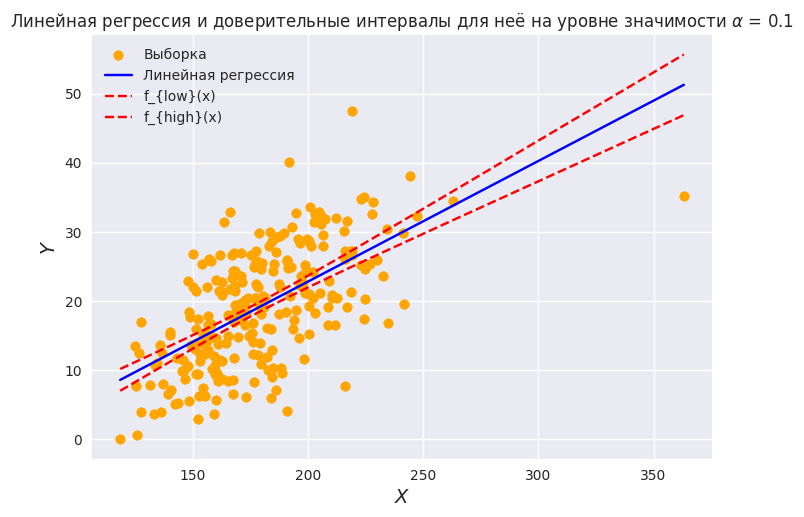

In [ ]:
plt.scatter(X, Y, label="Выборка", color="orange")
plt.plot(
    table["x"],
    table["f(x)"],
    label="Линейная регрессия",
    color="blue",
)

plt.plot(
    table["x"], table["f_low(x)"], label=r"f_{low}(x)", color="red", linestyle="--"
)
plt.plot(
    table["x"], table["f_high(x)"], label=r"f_{high}(x)", color="red", linestyle="--"
)

plt.legend()
plt.xlabel("$X$", fontsize=14)
plt.ylabel("$Y$", fontsize=14)
plt.title(
    r"Линейная регрессия и доверительные интервалы для неё на уровне значимости $\alpha$ = 0.1"
)
plt.show()

#### Построить график остатков $\varepsilon(x) = y - f(x)$

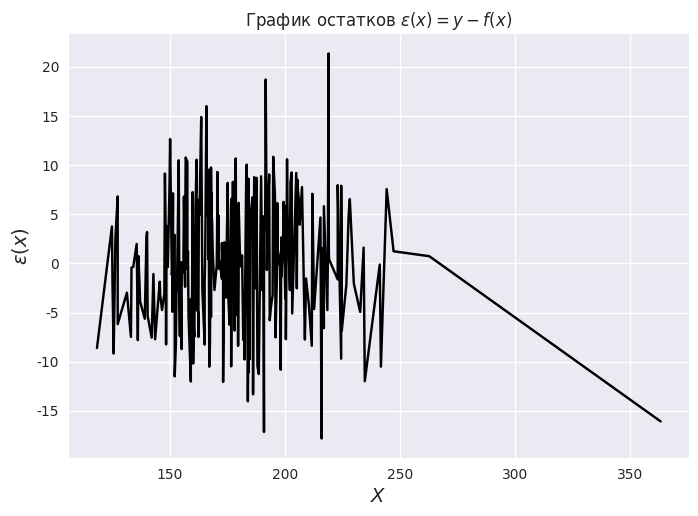

In [ ]:
plt.plot(table["x"], table["y"] - table["f(x)"], color="black")
plt.xlabel("$X$", fontsize=14)
plt.ylabel(r"$\varepsilon(x)$", fontsize=14)
plt.title(r"График остатков $\varepsilon(x) = y - f(x)$")
plt.show()

### 9.1.3. Проверка значимости линейной регрессионной модели

Статистическая гипотеза $H_0:\ \beta_1 = 0; \quad H':\ \beta_1 \neq 0$.

#### Указать формулы расчёта показателей, используемых при проверке значимости линейной регрессионной модели

|                                                                                  | Выражение                                                       | Пояснение использованных обозначений                |
| -------------------------------------------------------------------------------- | --------------------------------------------------------------- | --------------------------------------------------- |
| Формула расчёта статистики критерия                                              | $Z = \dfrac{\tilde{D}_{Y \mid X}}{\tilde{D}_{Y ост} / (n - 2)}$ | $n$ - объём выборки $(x_1, y_1), \dots, (x_n, y_n)$ |
| Закон распределения статистики критерия при условии истинности основной гипотезы | $F(1,\ n-2)$                                                    |                                                     |
| Формулы расчёта критической точки                                                | $F_{1 - \alpha,\ 1,\ n-2}$                                      | Правосторонняя критическая область.                 |
| Формула расчёта $p$-value                                                        | $1 - F_Z(z_{\text{выб}} \mid H_0)$                              |                                                     |

#### Проверить значимость линейной регрессионной модели

In [ ]:
alphas = [0.01, 0.05, 0.1]

z = r_value**2 * (n - 2) / (1 - r_value**2)

mprint(
    r"### Проверка значимости линейной регрессии",
    f"$H_0$: $\\beta_1 = 0$, $H_1$: $\\beta_1 \\neq 0$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
)

for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p_value)}")

### Проверка значимости линейной регрессии

$H_0$: $\beta_1 = 0$, $H_1$: $\beta_1 \neq 0$

$z_{выб} =$ 150.03

$p =$ 0.00

При $\alpha = 0.01$ $H_0$ отклоняется

При $\alpha = 0.05$ $H_0$ отклоняется

При $\alpha = 0.1$ $H_0$ отклоняется

`r_value` - выборочное значение коэффициента корреляции Пирсона $\tilde \rho^2_{XY}$. При линейной регрессии квадрат этого значения равен коэффициенту детерминации: $\tilde{\rho}_{XY}^2 = \tilde{R}^2$.

Статистика критерия же $Z = \dfrac{\tilde R^2}{(1 - \tilde R^2) / (n - 2)}$.

## 9.2 Линейная регрессионная модель общего вида

### Определения

In [ ]:
X, Y = data("9.2")
X.head(), Y.head()

(0    154.25
 1    173.25
 2    154.00
 3    184.75
 4    184.25
 Name: B7, dtype: float64,
 0    12.3
 1     6.1
 2    25.3
 3    10.4
 4    28.7
 Name: B2, dtype: float64)

In [ ]:
print(n1 := len(X), n2 := len(Y))

if n1 == n2:
    n = n1

252 252


In [ ]:
k = 3

### 9.2.1. Точечные оценки линейной регрессионной модели

#### Рассчитать точечные оценки параметров линейной регрессионной модели

Построим `design matrix` = $\begin{pmatrix}1 & x_1 & x_1^2 \\ 1 & x_2 & x_2^2 \\ \vdots & \vdots & \vdots \\ 1 & x_n & x_n^2\end{pmatrix}$.

In [ ]:
X.head()

,B7
0,154.25
1,173.25
2,154.00
3,184.75
4,184.25


In [ ]:
X.values.reshape(-1, 1)[:5]

array([[154.25],
       [173.25],
       [154.  ],
       [184.75],
       [184.25]])

In [ ]:
design_matrix = np.column_stack([X**i for i in range(3)])
design_matrix[:5]

array([[1.00000000e+00, 1.54250000e+02, 2.37930625e+04],
       [1.00000000e+00, 1.73250000e+02, 3.00155625e+04],
       [1.00000000e+00, 1.54000000e+02, 2.37160000e+04],
       [1.00000000e+00, 1.84750000e+02, 3.41325625e+04],
       [1.00000000e+00, 1.84250000e+02, 3.39480625e+04]])

Построим МНК-оценки параметров $\beta_0, \beta_1, \beta_2$ по формуле $\tilde{\beta}_{\downarrow} = (F^T F)^{-1} F^T y_{\downarrow}$, где $F$ - `design matrix`, $y_{\downarrow}$ - вектор значений результативного признака.

In [ ]:
model = sm.OLS(Y, design_matrix).fit()

mprint(
    f"$\\tilde{{\\beta_0}} =$ {model.params.iloc[0]:.2f}",
    f"$\\tilde{{\\beta_1}} =$ {model.params.iloc[1]:.2f}",
    f"$\\tilde{{\\beta_2}} =$ {model.params.iloc[2]:.2f}",
)

$\tilde{\beta_0} =$ -35.77

$\tilde{\beta_1} =$ 0.42

$\tilde{\beta_2} =$ -0.00

In [ ]:
predictions = model.predict(design_matrix)

#### Рассчитать показатели вариации, используемые в регрессионном анализе

In [ ]:
D_YX = sum((predictions - Y.mean()) ** 2) / n
D_resY = sum((predictions - Y) ** 2) / n
D_Y = Y.var(ddof=0)

D_YX_unbiased = D_YX * n / (k - 1)
D_resY_unbiased = D_resY * n / (n - k)
D_Y_unbiased = D_Y * n / (n - 1)

mprint(
    f"$\\tilde{{D}}_{{Y \\mid X}} =$ {D_YX:.2f}",
    f"$\\tilde{{D}}_{{Y ост}} =$ {D_resY:.2f}",
    f"$\\tilde{{D}}_{{Y общ}} =$ {D_Y:.2f}",
    f"$\\tilde{{D}}_{{Y \\mid X, несмещ}} =$ {D_YX_unbiased:.2f}",
    f"$\\tilde{{D}}_{{Y ост, несмещ}} =$ {D_resY_unbiased:.2f}",
    f"$\\tilde{{D}}_{{Y общ, несмещ}} =$ {D_Y_unbiased:.2f}",
)

$\tilde{D}_{Y \mid X} =$ 27.86

$\tilde{D}_{Y ост} =$ 41.90

$\tilde{D}_{Y общ} =$ 69.76

$\tilde{D}_{Y \mid X, несмещ} =$ 3510.06

$\tilde{D}_{Y ост, несмещ} =$ 42.41

$\tilde{D}_{Y общ, несмещ} =$ 70.04

#### Проверить правило сложения дисперсий

In [ ]:
mprint(
    f"$\\tilde{{D}}_{{Y \\mid X}} =$ {D_YX:.2f}",
    f"$\\tilde{{D}}_{{Y ост}} =$ {D_resY:.2f}",
    f"$\\tilde{{D}}_{{Y общ}} =$ {D_Y:.2f}",
    f"$\\tilde{{D}}_{{Y \\mid X}} + \\tilde{{D}}_{{Y ост}} = {D_YX + D_resY:.2f}$",
)
print(D_YX + D_resY - D_Y < 1e-10)

$\tilde{D}_{Y \mid X} =$ 27.86

$\tilde{D}_{Y ост} =$ 41.90

$\tilde{D}_{Y общ} =$ 69.76

$\tilde{D}_{Y \mid X} + \tilde{D}_{Y ост} = 69.76$

True


#### Рассчитать показатели тесноты связи между факторным и результативным признаками

In [ ]:
mprint(
    f"$\\tilde{{R^2}} =$ {model.rsquared:.2f}",
    f"$\\tilde{{R}} =$ {m.sqrt(model.rsquared):.2f}",
)

$\tilde{R^2} =$ 0.40

$\tilde{R} =$ 0.63

### 9.2.2. Интервальные оценки линейной регрессионной модели

#### Привести формулы расчёта доверительных интервалов для значений регрессии $f(x)$

| Границы доверительного интервала | Формула расчета                                                                                                                                                                |
| -------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| Нижняя граница $f_{low}(x)$      | $\tilde f(x) - t_{1 - \frac{\alpha}{2},\ (n-k)} \cdot \sqrt{\tilde{D}_{Y ост}^{несмещ}} \cdot \sqrt{\overrightarrow \varphi(x)\left(F^TF\right)^{-1} \varphi_{\downarrow}(x)}$ |
| Верхняя граница $f_{high}(x)$    | $\tilde f(x) + t_{1 - \frac{\alpha}{2},\ (n-k)} \cdot \sqrt{\tilde{D}_{Y ост}^{несмещ}} \cdot \sqrt{\overrightarrow \varphi(x)\left(F^TF\right)^{-1} \varphi_{\downarrow}(x)}$ |

#### Построить диаграмму рассеяния признаков $x$ и $y$. Нанести на диаграмму функцию регрессии $f(x)$, а также нижние и верхние границы линии регрессии $f_{low}(x)$ и $f_{high}(x)$ на уровне значимости $\alpha = 0.1$.

In [ ]:
alpha = 0.1

In [ ]:
table = pd.DataFrame(
    np.column_stack(
        [X, Y, predictions, model.get_prediction(design_matrix).conf_int(alpha=alpha)]
    ),
    columns=[
        "x",
        "y",
        "f(x)",
        "f_low(x)",
        "f_high(x)",
    ],
)
table.sort_values("x", inplace=True)
table

,x,y,f(x),f_low(x),f_high(x)
181,118.50,0.0,5.500397,3.258073,7.742722
73,125.00,13.5,7.249473,5.326688,9.172258
44,125.25,7.7,7.315676,5.404567,9.226786
171,125.75,0.7,7.447845,5.559948,9.335742
225,126.50,12.5,7.645504,5.792076,9.498932
...,...,...,...,...,...
151,241.75,19.6,29.550000,27.923030,31.176970
191,244.25,38.1,29.838669,28.145117,31.532220
34,247.25,32.3,30.174618,28.396211,31.953024
40,262.75,34.5,31.728702,29.419660,34.037745


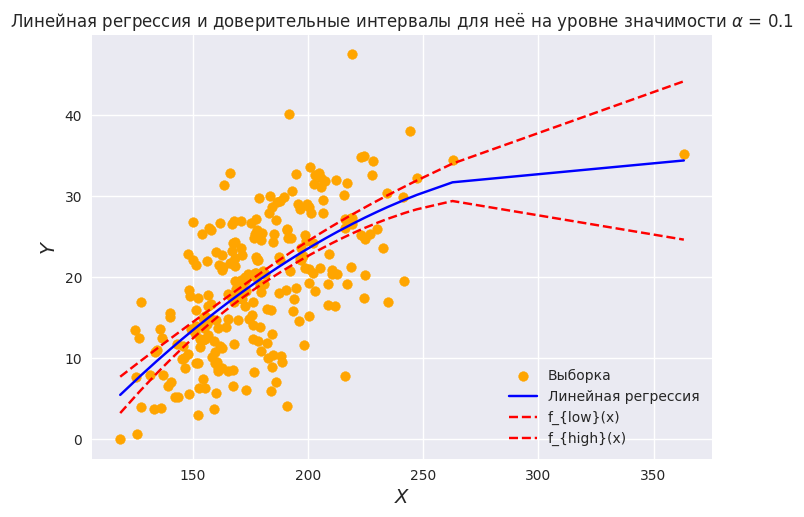

In [ ]:
plt.scatter(X, Y, label="Выборка", color="orange")
plt.plot(
    table["x"],
    table["f(x)"],
    label="Линейная регрессия",
    color="blue",
)

plt.plot(
    table["x"], table["f_low(x)"], label=r"f_{low}(x)", color="red", linestyle="--"
)
plt.plot(
    table["x"], table["f_high(x)"], label=r"f_{high}(x)", color="red", linestyle="--"
)

plt.legend()
plt.xlabel("$X$", fontsize=14)
plt.ylabel("$Y$", fontsize=14)
plt.title(
    r"Линейная регрессия и доверительные интервалы для неё на уровне значимости $\alpha$ = 0.1"
)
plt.show()

#### Построить график остатков $\varepsilon(x) = y - f(x)$

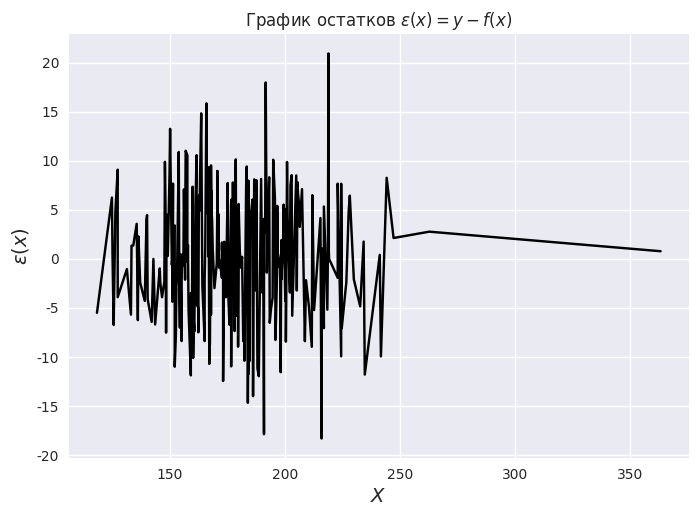

In [ ]:
plt.plot(table["x"], table["y"] - table["f(x)"], color="black")
plt.xlabel("$X$", fontsize=14)
plt.ylabel(r"$\varepsilon(x)$", fontsize=14)
plt.title(r"График остатков $\varepsilon(x) = y - f(x)$")
plt.show()

### 9.2.3. Проверка значимости линейной регрессионной модели

Статистическая гипотеза $H_0:\ \beta_1 = \beta_2 = 0; \quad H':\ \beta_1^2 + \beta_2^2 > 0$.

#### Указать формулы расчёта показателей, используемых при проверке значимости линейной регрессионной модели

|                                                                                  | Выражение                                                               | Пояснение использованных обозначений                |
| -------------------------------------------------------------------------------- | ----------------------------------------------------------------------- | --------------------------------------------------- |
| Формула расчёта статистики критерия                                              | $Z = \dfrac{\tilde{D}_{Y \mid X}^{несмещ}}{\tilde{D}_{Y ост}^{несмещ}}$ | $n$ - объём выборки $(x_1, y_1), \dots, (x_n, y_n)$ |
| Закон распределения статистики критерия при условии истинности основной гипотезы | $F(k-1,\ n-2)$                                                          |                                                     |
| Формулы расчёта критической точки                                                | $F_{1 - \alpha,\ k-1,\ n-2}$                                            | Правосторонняя критическая область.                 |
| Формула расчёта $p$-value                                                        | $1 - F_Z(z_{\text{выб}} \mid H_0)$                                      |                                                     |

#### Проверить значимость линейной регрессионной модели

In [ ]:
alphas = [0.01, 0.05, 0.1]

z = model.fvalue
p_value = model.f_pvalue

mprint(
    r"### Проверка значимости линейной регрессии",
    f"$H_0$: $\\beta_1 = \\beta_2 = 0$, $H_1$: $\\beta_1^2 + \\beta_2^2 > 0$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
)

for alpha in alphas:
    mprint(f"При $\\alpha = {alpha}$ {verdict(alpha, p_value)}")

### Проверка значимости линейной регрессии

$H_0$: $\beta_1 = \beta_2 = 0$, $H_1$: $\beta_1^2 + \beta_2^2 > 0$

$z_{выб} =$ 82.77

$p =$ 0.00

При $\alpha = 0.01$ $H_0$ отклоняется

При $\alpha = 0.05$ $H_0$ отклоняется

При $\alpha = 0.1$ $H_0$ отклоняется

<a id="93"></a>

## 9.3 Множественная линейная регрессионная модель

### Определения

In [ ]:
X1, X2, Y = data("9.3")
X1.head(), X2.head(), Y.head()

(0    154.25
 1    173.25
 2    154.00
 3    184.75
 4    184.25
 Name: B7, dtype: float64,
 0    23
 1    22
 2    22
 3    26
 4    24
 Name: B4, dtype: int64,
 0    12.3
 1     6.1
 2    25.3
 3    10.4
 4    28.7
 Name: B2, dtype: float64)

In [ ]:
print(n1 := len(X1), n2 := len(X2), n3 := len(Y))

if n1 == n2 == n3:
    n = n1

252 252 252


In [ ]:
k = 3

### Рассчитать точечные оценки параметров множественной линейной регрессионной модели

В данном случае $\varphi_0(x) = 1$, $\varphi_1(x) = x_1$, $\varphi_2(x) = x_2$.

`design matrix` точно такая же: $\begin{pmatrix}1 & x_{11} & x_{12} \\ 1 & x_{21} & x_{22} \\ \vdots & \vdots & \vdots \\ 1 & x_{n1} & x_{n2}\end{pmatrix}$.

In [ ]:
vector_X = np.column_stack([X1, X2])
vector_X[:5]

array([[154.25,  23.  ],
       [173.25,  22.  ],
       [154.  ,  22.  ],
       [184.75,  26.  ],
       [184.25,  24.  ]])

In [ ]:
design_matrix = sm.add_constant(vector_X)
design_matrix[:5]

array([[  1.  , 154.25,  23.  ],
       [  1.  , 173.25,  22.  ],
       [  1.  , 154.  ,  22.  ],
       [  1.  , 184.75,  26.  ],
       [  1.  , 184.25,  24.  ]])

Построим МНК-оценки параметров $\beta_0, \beta_1, \beta_2$ по формуле $\tilde{\beta}_{\downarrow} = (F^T F)^{-1} F^T y_{\downarrow}$, где $F$ - `design matrix`, $y_{\downarrow}$ - вектор значений результативного признака.

In [ ]:
model = sm.OLS(Y, design_matrix).fit()

mprint(
    f"$\\tilde{{\\beta_0}} =$ {model.params.iloc[0]:.2f}",
    f"$\\tilde{{\\beta_1}} =$ {model.params.iloc[1]:.2f}",
    f"$\\tilde{{\\beta_2}} =$ {model.params.iloc[2]:.2f}",
)

$\tilde{\beta_0} =$ -21.17

$\tilde{\beta_1} =$ 0.18

$\tilde{\beta_2} =$ 0.20

### Записать точечную оценку уравнения регрессии

$\tilde f(x) = \tilde \beta_0 + \tilde \beta_1x_1 + \tilde \beta_2x_2 = 474.69 - 432.08x_1 + 0.01x_2$

In [ ]:
predictions = model.predict(design_matrix)
print(predictions)

[10.47104903 13.60630572 10.22841307 16.41933645 15.93406454 20.49641305
 15.76130541 14.68516348 17.31728762 18.19194651 16.68254886 22.10169563
 16.86617127 20.81164166 18.73466627 14.3477927  19.93969859 21.91107587
 16.64139595 22.54853045 15.80788997 19.58060124  9.6045376  11.29484183
 10.93846031 12.14349263  8.66543351 10.96446841  7.58114412 12.80423948
 17.12938368 12.71650201 13.67889838 25.32312408 30.36802869 22.21930713
 22.27288904 23.29544907 51.69941066 24.39216746 33.88295919 23.55051402
 26.45128222 24.18253695  8.56255123 16.20114288 10.20898672 12.64234365
 11.59764145 10.54750761 15.94336211 11.21796765 13.05345719 15.37578436
 11.08907726 24.30986163 22.20959396 26.47029296 25.09949887 22.49881447
 29.05854837 21.32950342 23.47635565 22.19173332 26.22222536 21.96424218
 16.15027679 16.91933757 16.80830782 17.27028746 20.54801364 15.51553803
 18.17095445 11.69895803 16.05011032 16.97135377 18.67680282 23.73800235
 23.22787245 22.00111356 20.88381871 17.91860532 24

### Рассчитать показатели вариации, используемые в регрессионном анализе

In [ ]:
D_YX = sum((predictions - Y.mean()) ** 2) / n
D_resY = sum((predictions - Y) ** 2) / n
D_Y = Y.var(ddof=0)

D_YX_unbiased = D_YX * n / (k - 1)
D_resY_unbiased = D_resY * n / (n - k)
D_Y_unbiased = D_Y * n / (n - 1)

mprint(
    f"$\\tilde{{D}}_{{Y \\mid X_1, X_2}} =$ {D_YX:.2f}",
    f"$\\tilde{{D}}_{{Y ост}} =$ {D_resY:.2f}",
    f"$\\tilde{{D}}_{{Y общ}} =$ {D_Y:.2f}",
    f"$\\tilde{{D}}_{{Y \\mid X_1, X_2, несмещ}} =$ {D_YX_unbiased:.2f}",
    f"$\\tilde{{D}}_{{Y ост, несмещ}} =$ {D_resY_unbiased:.2f}",
    f"$\\tilde{{D}}_{{Y общ, несмещ}} =$ {D_Y_unbiased:.2f}",
)

$\tilde{D}_{Y \mid X_1, X_2} =$ 32.41

$\tilde{D}_{Y ост} =$ 37.35

$\tilde{D}_{Y общ} =$ 69.76

$\tilde{D}_{Y \mid X_1, X_2, несмещ} =$ 4083.82

$\tilde{D}_{Y ост, несмещ} =$ 37.80

$\tilde{D}_{Y общ, несмещ} =$ 70.04

| Источник вариации   | Показатель вариации                   | Число степеней свободы | Несмещённая оценка                                      |
| ------------------- | ------------------------------------- | ---------------------- | ------------------------------------------------------- |
| Регрессия           | $\tilde{D}_{Y \mid X_1, X_2} = 68.09$ | $k - 1 = 2$            | $\dfrac{n}{k - 1}\tilde{D}_{Y \mid X_1, X_2} = 8578.86$ |
| Остаточные признаки | $\tilde{D}_{Y\text{ ост}} = 1.67$     | $n - k = 249$          | $\dfrac{n}{n - k}\tilde{D}_{Y\text{ ост}} = 1.69$       |
| Все признаки        | $\tilde{D}_{Y \text{ общ}} = 69.76$   | $n - 1 = 251$          | $\dfrac{n}{n - 1}\tilde{D}_{Y \text{ общ}} = 70.04$     |

$k$ — число оцениваемых параметров функции регрессии.

### Проверить правило сложения дисперсий

In [ ]:
mprint(
    f"$\\tilde{{D}}_{{Y \\mid X_1, X_2}} =$ {D_YX:.2f}",
    f"$\\tilde{{D}}_{{Y ост}} =$ {D_resY:.2f}",
    f"$\\tilde{{D}}_{{Y общ}} =$ {D_Y:.2f}",
    f"$\\tilde{{D}}_{{Y \\mid X_1, X_2}} + \\tilde{{D}}_{{Y ост}} = {D_YX + D_resY:.2f}$",
)
print(D_YX + D_resY - D_Y < 1e-10)

$\tilde{D}_{Y \mid X_1, X_2} =$ 32.41

$\tilde{D}_{Y ост} =$ 37.35

$\tilde{D}_{Y общ} =$ 69.76

$\tilde{D}_{Y \mid X_1, X_2} + \tilde{D}_{Y ост} = 69.76$

True


### Рассчитать показатели тесноты связи между факторными и результативным признаками

In [ ]:
mprint(
    f"$\\tilde{{R^2}} =$ {model.rsquared:.2f}",
    f"$\\tilde{{R}} =$ {m.sqrt(model.rsquared):.2f}",
)

$\tilde{R^2} =$ 0.46

$\tilde{R} =$ 0.68

| Показатель               | Формула расчета                                                                                         | Значение |
| ------------------------ | ------------------------------------------------------------------------------------------------------- | -------- |
| Коэффициент детерминации | $\tilde{R^2} = \dfrac{\tilde{D}_{Y \mid X_1, X_2}}{\tilde{D}_{Y \text{ общ}}}$                          | 0.98     |
| Корреляционное отношение | $\tilde R = \sqrt{\tilde{R^2}} = \sqrt{\dfrac{\tilde{D}_{Y \mid X_1, X_2}}{\tilde{D}_{Y \text{ общ}}}}$ | 0.99     |


<a id="94"></a>

### Сводная таблица показателей вариации для различных регрессионных моделей